# Assignment - Acquisition Analytics

### Business Objective: Achieve 80% of total responders at the minimum possible cost
### Predict the probability of response and target most likely respondents in the telemarketing campaign
   ##### Excluding “duration” from the model
### How many prospects should be called to meet the business objective?
   ##### Calculating the X in top X%

## Data Understanding

The first step in solving any machine learning problem is data understanding. We will import the requisite libraries and apply univariate and multivariate analysis.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loan = pd.read_csv("bank_marketing.csv", sep=",")
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
response          41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [3]:
loan.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
response          0
dtype: int64

We can note that the dataset has 41188 data entries across 21 columns, one of them being the response (Target variable). Another thing to note is that there are no null values. That is, the dataset is completely clean.

In [4]:
# let's look at the first few rows of the dataframe
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Looking at all the column names
loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response'],
      dtype='object')

In [6]:
loan['response'].value_counts()

no     36548
yes     4640
Name: response, dtype: int64

As we note that the response variable has 'yes' and 'no' responses, we will convert it to 1 and 0 respectively

In [7]:
loan['response'] = loan['response'].map({'yes': 1, 'no': 0})

In [8]:
loan['response'].head()

0    0
1    0
2    0
3    0
4    0
Name: response, dtype: int64

In [9]:
loan['response'].value_counts()

0    36548
1     4640
Name: response, dtype: int64

In [10]:
# Copy the dataset into a back up dataframe for future use

loan_copy = loan

In [11]:
# Determine the percentage of people who have bought the investment product, that is those who have the response varibale as 1

100*(loan['response'].sum()/loan['response'].count()).round(4)

11.27

## Exploratory Data Analysis

Now, we will do Exploratory Data Analysis on individual features and look for patterns.

First, we will look at the client data.

- Age
- Job : type of job
- Marital : marital status
- Education
- Default: has credit in default?
- Housing: has housing loan?
- Loan: has personal loan?

#### Age

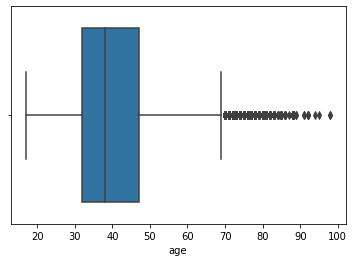

In [12]:
sns.boxplot(x='age', data=loan)
plt.show()

In [13]:
# Since there are a fair few data entries with age > 71, we will club all of those ages at 71 (since we can assume 
# that the behaviour will not change significantly with age at age above 70)

loan['age'][loan['age']>71] =71

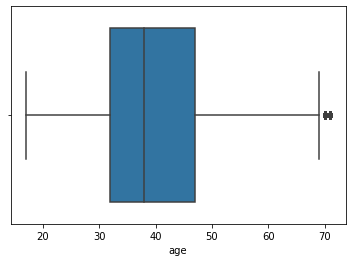

In [14]:
sns.boxplot(x='age', data=loan)
plt.show()

In [15]:
# To understand the behaviour of people with age, we are going to bucket the age groups into brackets of 10 and 
# study the response rates

bins = np.arange(10,loan['age'].max() + 10, 10)
loan['age_bins'] = pd.cut(loan['age'], bins, include_lowest=True)

In [16]:
No_of_prospect = loan.groupby('age_bins')['response'].count().reset_index(name = 'No.of_prospect')

In [17]:
count_prospects = loan[loan['response']==1].groupby('age_bins')['response'].count().reset_index(name = 'count_prospects')

In [18]:
agg_age = No_of_prospect.merge(count_prospects, on='age_bins')

In [19]:
agg_age['response_rate'] = 100*(agg_age['count_prospects']/agg_age['No.of_prospect']).round(3)

In [20]:
agg_age

,age_bins,No.of_prospect,count_prospects,response_rate
0,"(9.999, 20.0]",140,57,40.7
1,"(20.0, 30.0]",7243,1067,14.7
2,"(30.0, 40.0]",16385,1597,9.7
3,"(40.0, 50.0]",10240,837,8.2
4,"(50.0, 60.0]",6270,668,10.7
5,"(60.0, 70.0]",488,212,43.4
6,"(70.0, 80.0]",422,202,47.9


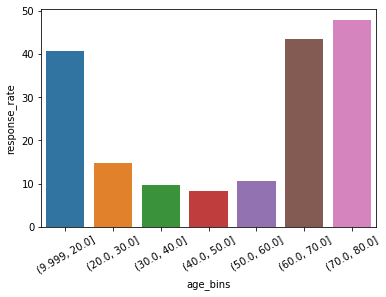

In [21]:
ax = sns.barplot(x='age_bins', y='response_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

As we can see, the youngest and the eldest are the most likely to buy the investment product being offered by the bank.

In [22]:
# Note that we have added a new column named age bucket to the table

loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,age_bins
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(30.0, 40.0]"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(30.0, 40.0]"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"


Similarly, we will look at the relation between response rate and job. Note that since job is already a categorical variable, we don't need to bucket the data

#### Job

In [23]:
loan['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [24]:
count_prospects_job = loan.groupby('job')['response'].sum().reset_index(name = 'count_prospects')

In [25]:
No_of_prospect_job = loan.groupby('job')['response'].count().reset_index(name = 'No_of_prospects')

In [26]:
agg_job = count_prospects_job.merge(No_of_prospect_job, on = 'job')

In [27]:
agg_job['response_rate'] = 100*(agg_job['count_prospects']/agg_job['No_of_prospects']).round(4)

In [28]:
agg_job

,job,count_prospects,No_of_prospects,response_rate
0,admin.,1352,10422,12.97
1,blue-collar,638,9254,6.89
2,entrepreneur,124,1456,8.52
3,housemaid,106,1060,10.00
4,management,328,2924,11.22
5,retired,434,1720,25.23
6,self-employed,149,1421,10.49
7,services,323,3969,8.14
8,student,275,875,31.43
9,technician,730,6743,10.83


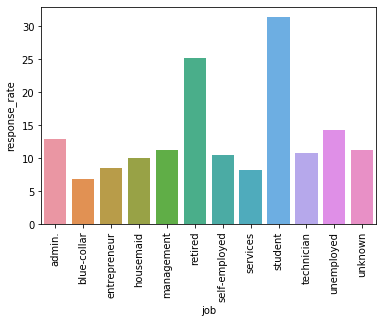

In [29]:
ax = sns.barplot(x='job', y='response_rate', data=agg_job)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

We can draw similarities from the age response analysis where we found that the youngest and eldest were most likely to respond in a positive manner. It is rreiterated by the above analysis, where we notice that student and retired have the highest response rates.

#### Marital

In [30]:
loan['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

Since there are 80 entries which list marital status as 'unknown', we will assign them to the biggest group, which is, 'married'.

In [31]:
loan.replace({'marital' : { 'unknown' : 'married'}}, inplace=True)

In [32]:
count_prospects_marital = loan.groupby('marital')['response'].sum().reset_index(name = 'count_prospects')

In [33]:
No_of_prospect_job = loan.groupby('marital')['response'].count().reset_index(name = 'No_of_prospects')

In [34]:
agg_marital = count_prospects_marital.merge(No_of_prospect_job, on = 'marital')

In [35]:
agg_marital['response_rate'] = 100*(agg_marital['count_prospects']/agg_marital['No_of_prospects']).round(4)

In [36]:
agg_marital

,marital,count_prospects,No_of_prospects,response_rate
0,divorced,476,4612,10.32
1,married,2544,25008,10.17
2,single,1620,11568,14.00


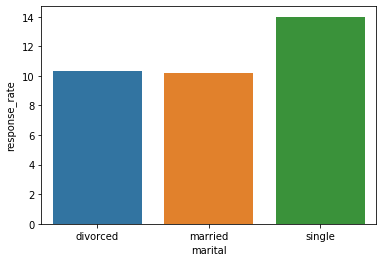

In [37]:
ax = sns.barplot(x='marital', y='response_rate', data=agg_marital)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You may note that there is a slight uptick in response rate for single customers, this can be attributed in part to the fact that people under the age of 20 have a very high response rate. 

#### Education

In [38]:
loan['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

To simplify the problem, we are going to convert the educational qualifications to simple buckets of primary educations, secondary education, tertiary education and professional courses. Also note that there are 18 entries listing the educational status as illiterate. Since the closest group to them is primary education, we are going to assign all entries with educational status as illiterate to primary education.

In [39]:
loan.replace({'education' : { 'basic.9y' : 'Primary_Education', 'basic.4y' : 'Primary_Education','basic.6y' : 'Primary_Education','illiterate' : 'Primary_Education',
                             'high.school' : 'Secondary_Education', 'university.degree' : 'Tertiary_Education' }}, inplace=True)

In [40]:
loan['education'].value_counts()

Primary_Education      12531
Tertiary_Education     12168
Secondary_Education     9515
professional.course     5243
unknown                 1731
Name: education, dtype: int64

In [41]:
count_prospects_education = loan.groupby('education')['response'].sum().reset_index(name = 'count_prospects')

In [42]:
No_of_prospect_education = loan.groupby('education')['response'].count().reset_index(name = 'No_of_prospects')

In [43]:
agg_education = count_prospects_education.merge(No_of_prospect_education, on = 'education')

In [44]:
agg_education['response_rate'] = 100*(agg_education['count_prospects']/agg_education['No_of_prospects']).round(4)

In [45]:
agg_education

,education,count_prospects,No_of_prospects,response_rate
0,Primary_Education,1093,12531,8.72
1,Secondary_Education,1031,9515,10.84
2,Tertiary_Education,1670,12168,13.72
3,professional.course,595,5243,11.35
4,unknown,251,1731,14.50


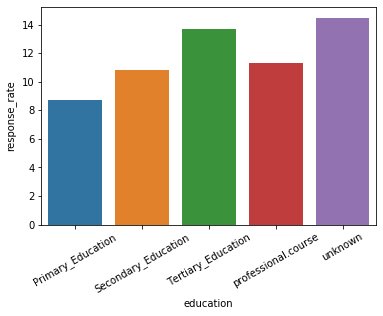

In [46]:
ax = sns.barplot(x='education', y='response_rate', data=agg_education)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

You can note that the response rate is lowest for people with highest education qualification as primary education, which may be attributed, in part, to lack of awareness and a lack of trust between the bank and the customer. It is the highest for people with tertiary education.

#### Previous Default

In [47]:
loan['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [48]:
count_prospects_default = loan.groupby('default')['response'].sum().reset_index(name = 'count_prospects')

In [49]:
No_of_prospect_default = loan.groupby('default')['response'].count().reset_index(name = 'No_of_prospects')

In [50]:
agg_default = count_prospects_default.merge(No_of_prospect_default, on = 'default')

In [51]:
agg_default['response_rate'] = 100*(agg_default['count_prospects']/agg_default['No_of_prospects']).round(4)

In [52]:
agg_default

,default,count_prospects,No_of_prospects,response_rate
0,no,4197,32588,12.88
1,unknown,443,8597,5.15
2,yes,0,3,0.00


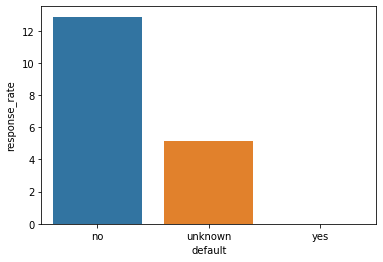

In [53]:
ax = sns.barplot(x='default', y='response_rate', data=agg_default)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

#### Housing

In [54]:
loan['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [55]:
count_prospects_housing = loan.groupby('housing')['response'].sum().reset_index(name = 'count_prospects')

In [56]:
No_of_prospect_housing = loan.groupby('housing')['response'].count().reset_index(name = 'No_of_prospects')

In [57]:
agg_housing = count_prospects_housing.merge(No_of_prospect_housing, on = 'housing')

In [58]:
agg_housing['response_rate'] = 100*(agg_housing['count_prospects']/agg_housing['No_of_prospects']).round(4)

In [59]:
agg_housing

,housing,count_prospects,No_of_prospects,response_rate
0,no,2026,18622,10.88
1,unknown,107,990,10.81
2,yes,2507,21576,11.62


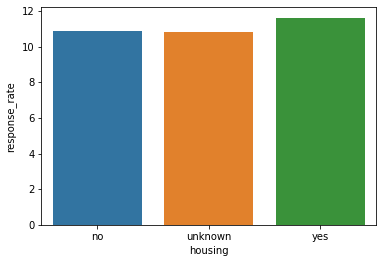

In [60]:
ax = sns.barplot(x='housing', y='response_rate', data=agg_housing)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can see that there is a slight uptick in the response rate for people with housing, though it is probably not very significant

#### Loan

In [61]:
loan['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [62]:
count_prospects_loan = loan.groupby('loan')['response'].sum().reset_index(name = 'count_prospects')

In [63]:
No_of_prospect_loan = loan.groupby('loan')['response'].count().reset_index(name = 'No_of_prospects')

In [64]:
agg_loan = count_prospects_loan.merge(No_of_prospect_loan, on = 'loan')

In [65]:
agg_loan['response_rate'] = 100*(agg_loan['count_prospects']/agg_loan['No_of_prospects']).round(4)

In [66]:
agg_loan

,loan,count_prospects,No_of_prospects,response_rate
0,no,3850,33950,11.34
1,unknown,107,990,10.81
2,yes,683,6248,10.93


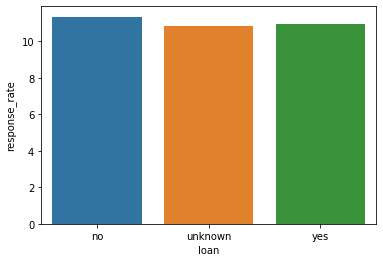

In [67]:
ax = sns.barplot(x='loan', y='response_rate', data=agg_loan)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

As you can see there seems to be very little correlation between a prospect having a personal loan and the likelihood of him/her responding positively to the investment product

Now that we have had a look at the client data, we will move to the last contact information.

There are four features in the given dataset which cover this information. (Refer to the data dictionary for the same)

- Contact: contact communication type
- Month: last contact month of year
- Day_of_week: last contact day of the week
- Duration: last contact duration, in seconds 

Please note that the attribute, duration highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Contact

In [68]:
loan['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [69]:
count_prospects_contact = loan.groupby('contact')['response'].sum().reset_index(name = 'count_prospects')

In [70]:
No_of_prospect_contact = loan.groupby('contact')['response'].count().reset_index(name = 'No_of_prospects')

In [71]:
agg_contact = count_prospects_contact.merge(No_of_prospect_contact, on = 'contact')

In [72]:
agg_contact['response_rate'] = 100*(agg_contact['count_prospects']/agg_contact['No_of_prospects']).round(4)

In [73]:
agg_contact

,contact,count_prospects,No_of_prospects,response_rate
0,cellular,3853,26144,14.74
1,telephone,787,15044,5.23


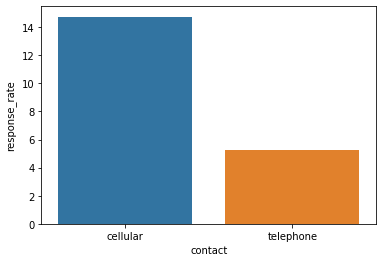

In [74]:
ax = sns.barplot(x='contact', y='response_rate', data=agg_contact)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can see that the prospective customers contacted through cellular medium are significantly more likely to opt in to the investment scheme compared to customers contacted through telephonic medium.

#### Month

In [75]:
loan['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [76]:
count_prospects_month = loan.groupby('month')['response'].sum().reset_index(name = 'count_prospects')

In [77]:
No_of_prospect_month = loan.groupby('month')['response'].count().reset_index(name = 'No_of_prospects')

In [78]:
agg_month = count_prospects_month.merge(No_of_prospect_month, on = 'month')

In [79]:
agg_month['response_rate'] = 100*(agg_month['count_prospects']/agg_month['No_of_prospects']).round(4)

In [80]:
agg_month

,month,count_prospects,No_of_prospects,response_rate
0,apr,539,2632,20.48
1,aug,655,6178,10.60
2,dec,89,182,48.90
3,jul,649,7174,9.05
4,jun,559,5318,10.51
5,mar,276,546,50.55
6,may,886,13769,6.43
7,nov,416,4101,10.14
8,oct,315,718,43.87
9,sep,256,570,44.91


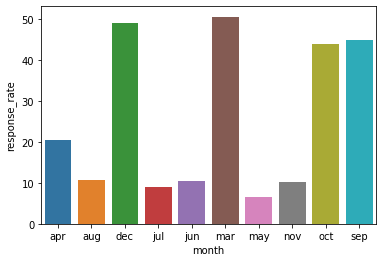

In [81]:
ax = sns.barplot(x='month', y='response_rate', data=agg_month)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

We can note that the four months of december, march, october and september appear to be the best to contact the potential customers. However, please note that these our months have the fewest data entries as well, so it is not certain, how well it would behave when calls are made at a high volume.

#### Day of the week

In [82]:
loan['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [83]:
count_prospects_day = loan.groupby('day_of_week')['response'].sum().reset_index(name = 'count_prospects')

In [84]:
No_of_prospect_day = loan.groupby('day_of_week')['response'].count().reset_index(name = 'No_of_prospects')

In [85]:
agg_day = count_prospects_day.merge(No_of_prospect_day, on = 'day_of_week')

In [86]:
agg_day['response_rate'] = 100*(agg_day['count_prospects']/agg_day['No_of_prospects']).round(4)

In [87]:
agg_day

,day_of_week,count_prospects,No_of_prospects,response_rate
0,fri,846,7827,10.81
1,mon,847,8514,9.95
2,thu,1045,8623,12.12
3,tue,953,8090,11.78
4,wed,949,8134,11.67


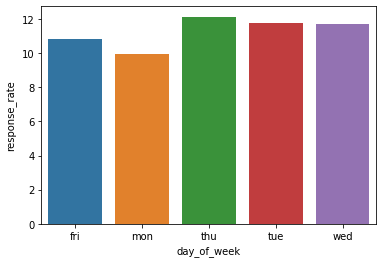

In [88]:
ax = sns.barplot(x='day_of_week', y='response_rate', data=agg_day)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

As you can note that response rate is lowest on monday, while being highest on thursday. However, the gap isn't very big.

#### Duration of the call

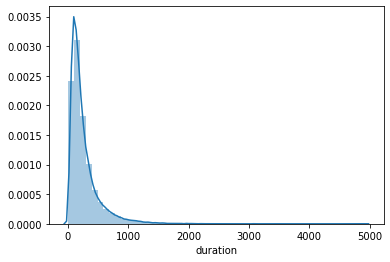

In [89]:
sns.distplot(loan['duration'])
plt.show()

As we know that this is a continuos variable, we will create a box plot

In [90]:
loan['duration'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
95%        752.650000
99%       1271.130000
max       4918.000000
Name: duration, dtype: float64

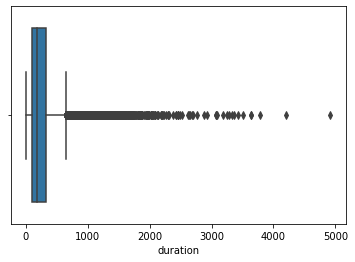

In [91]:
sns.boxplot(x='duration', data=loan)
plt.show()

Since less than one percent of entires have duration greater than 1271, we can assume all entries with duration greater than 1271 as having duration as 1271.

In [92]:
loan['duration'][loan['duration']>1271] =1271

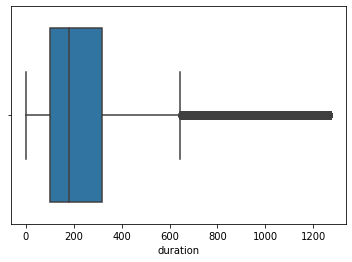

In [93]:
sns.boxplot(x='duration', data=loan)
plt.show()

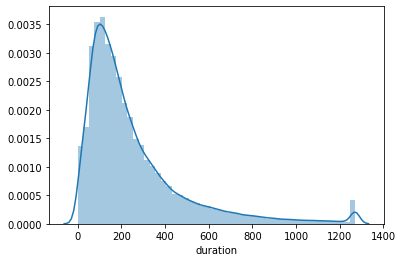

In [94]:
sns.distplot(loan['duration'])
plt.show()

Now that we have looked at client data and the data related to last contact, we will look at some of the other attributes.

- Campaign: number of contacts performed during this campaign and for this client
- Pdays: number of days that passed by after the client was last contacted from a previous campaign
- Previous: number of contacts performed before this campaign and for this client
- Poutcome: outcome of the previous marketing campaign

#### Campaign

In [95]:
loan['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

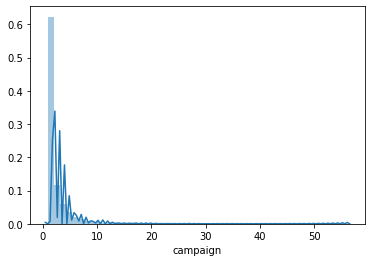

In [96]:
sns.distplot(loan['campaign'])
plt.show()

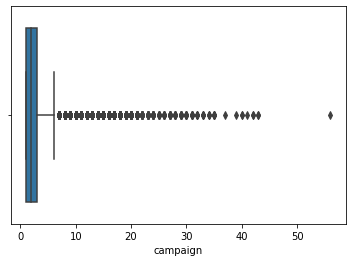

In [97]:
# We will create a box plot

sns.boxplot(x='campaign', data=loan)
plt.show()

In [98]:
loan['campaign'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
95%          7.000000
99%         14.000000
max         56.000000
Name: campaign, dtype: float64

Once again, we can merga all data entries with contacts greater than 14 as having campaign contact as 14

In [99]:
loan['campaign'][loan['campaign']>14] =14

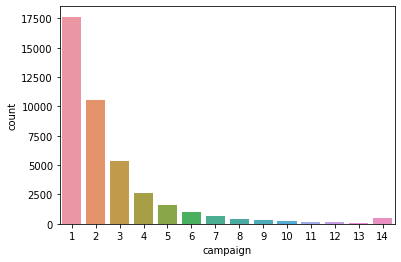

In [100]:
sns.countplot(loan['campaign'])
plt.show()

In [101]:
count_prospects_campaign = loan.groupby('campaign')['response'].sum().reset_index(name = 'count_prospects')

In [102]:
No_of_prospect_campaign = loan.groupby('campaign')['response'].count().reset_index(name = 'No_of_prospects')

In [103]:
agg_campaign = count_prospects_campaign.merge(No_of_prospect_campaign, on = 'campaign')

In [104]:
agg_campaign['response_rate'] = 100*(agg_campaign['count_prospects']/agg_campaign['No_of_prospects']).round(4)

In [105]:
agg_campaign

,campaign,count_prospects,No_of_prospects,response_rate
0,1,2300,17642,13.04
1,2,1211,10570,11.46
2,3,574,5341,10.75
3,4,249,2651,9.39
4,5,120,1599,7.50
5,6,75,979,7.66
6,7,38,629,6.04
7,8,17,400,4.25
8,9,17,283,6.01
9,10,12,225,5.33


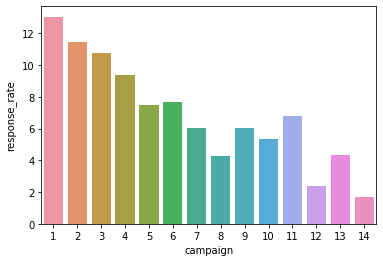

In [106]:
ax = sns.barplot(x='campaign', y='response_rate', data=agg_campaign)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

Interesting to note, that the response rate gradually decreases as the number of campaign contacts increases.

#### Gap after the last contact

In [107]:
loan['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

We are going to divide the pdays into three buckets, that is contacted within the first ten days, contacted after first ten days and first time contacted. Note that the pdays value of 999 means client was bot previously contacted.

In [108]:
loan['pdays'][loan['pdays'].isin([0,1,2,3,4,5,6,7,8,9,10])]='Contacted_in_first_10days'

loan['pdays'][loan['pdays'].isin([999])]='First_time_contacted'

loan['pdays'][~loan['pdays'].isin(['Contacted_in_first_10days','First_time_contacted'])]='Contacted_after_10days'

In [109]:
loan['pdays'].value_counts()

First_time_contacted         39673
Contacted_in_first_10days     1311
Contacted_after_10days         204
Name: pdays, dtype: int64

In [110]:
count_prospects_pdays = loan.groupby('pdays')['response'].sum().reset_index(name = 'count_prospects')

In [111]:
No_of_prospect_pdays = loan.groupby('pdays')['response'].count().reset_index(name = 'No_of_prospects')

In [112]:
agg_pdays = count_prospects_pdays.merge(No_of_prospect_pdays, on = 'pdays')

In [113]:
agg_pdays['response_rate'] = 100*(agg_pdays['count_prospects']/agg_pdays['No_of_prospects']).round(4)

In [114]:
agg_pdays

,pdays,count_prospects,No_of_prospects,response_rate
0,Contacted_after_10days,116,204,56.86
1,Contacted_in_first_10days,851,1311,64.91
2,First_time_contacted,3673,39673,9.26


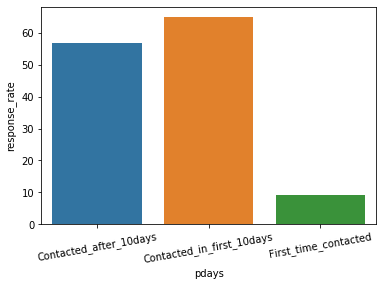

In [115]:
ax = sns.barplot(x='pdays', y='response_rate', data=agg_pdays)
ax.set_xticklabels(ax.get_xticklabels(),rotation=10)
plt.show()

Though there is a huge difference in the response rates of the three categories, it is important to note that there is also a huge difference in the volume of data entries in these categories

#### Previous

In [116]:
loan['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

Since the data ranges from 0 to 7, we are going to break it into three categories, that is never contacted, contacted less than three times and contacted greater than three times

In [117]:
loan['previous'][loan['previous'].isin([0])]='Never contacted'
loan['previous'][loan['previous'].isin([1,2,3])]='Less_than_3_times'
loan['previous'][loan['previous'].isin([4,5,6,7])]='More than_3_times'

In [118]:
loan['previous'].value_counts()

Never contacted      35563
Less_than_3_times     5531
More than_3_times       94
Name: previous, dtype: int64

In [119]:
count_prospects_previous = loan.groupby('previous')['response'].sum().reset_index(name = 'count_prospects')

In [120]:
No_of_prospect_previous = loan.groupby('previous')['response'].count().reset_index(name = 'No_of_prospects')

In [121]:
agg_previous = count_prospects_previous.merge(No_of_prospect_previous, on = 'previous')

In [122]:
agg_previous['response_rate'] = 100*(agg_previous['count_prospects']/agg_previous['No_of_prospects']).round(4)

In [123]:
agg_previous

,previous,count_prospects,No_of_prospects,response_rate
0,Less_than_3_times,1445,5531,26.13
1,More than_3_times,54,94,57.45
2,Never contacted,3141,35563,8.83


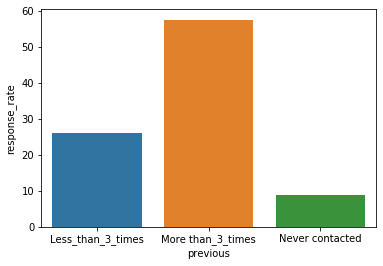

In [124]:
ax = sns.barplot(x='previous', y='response_rate', data=agg_previous)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

We can note that the response rate is greatest for the the potential customers having previous contact of more than three. However, please note that  the number of data entries is very low for such cases, hence it's difficult to draw any inferences.

Now that we have analysed all the client related information, we will move to the wider social and economic variables, which gives us a clue of the conditions when a client is more likely to buy the product.

- emp.var.rate: Employment Variation Rate - Quarterly Indicator
- cons.price.idx: Consumer Price Index - Monthly Indicator 
- cons.conf.idx: Consumer Confidence Index - Monthly Indicator 
- euribor3m: Euribor 3 Month Rate - Daily Indicator
- nr.employed: Number of Employees - Quarterly Indicator

In [125]:
loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response', 'age_bins'],
      dtype='object')

#### Employment Variation Rate

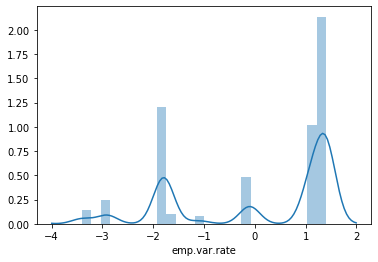

In [126]:
sns.distplot(loan['emp.var.rate'])
plt.show()

In [127]:
loan['emp.var.rate'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
95%          1.400000
99%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

In [128]:
loan['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

In [129]:
count_prospects_emp_var_rate = loan.groupby('emp.var.rate')['response'].sum().reset_index(name = 'count_prospects')

In [130]:
No_of_prospect_emp_var_rate = loan.groupby('emp.var.rate')['response'].count().reset_index(name = 'No_of_prospects')

In [131]:
agg_emp_var_rate = count_prospects_emp_var_rate.merge(No_of_prospect_emp_var_rate, on = 'emp.var.rate')

In [132]:
agg_emp_var_rate['response_rate'] = 100*(agg_emp_var_rate['count_prospects']/agg_emp_var_rate['No_of_prospects']).round(4)

In [133]:
agg_emp_var_rate

,emp.var.rate,count_prospects,No_of_prospects,response_rate
0,-3.4,454,1071,42.39
1,-3.0,88,172,51.16
2,-2.9,594,1663,35.72
3,-1.8,1461,9184,15.91
4,-1.7,403,773,52.13
5,-1.1,301,635,47.40
6,-0.2,1,10,10.00
7,-0.1,232,3683,6.30
8,1.1,240,7763,3.09
9,1.4,866,16234,5.33


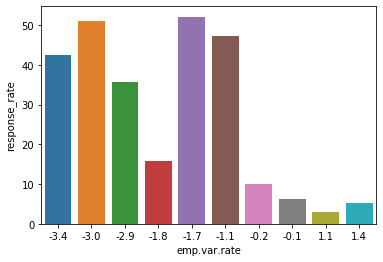

In [134]:
ax = sns.barplot(x='emp.var.rate', y='response_rate', data=agg_emp_var_rate)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can note that a negative employment variation rate seems to be related to higher response rates.

#### Consumer Price Index

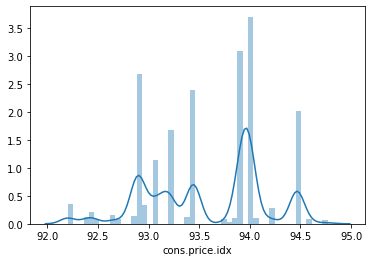

In [135]:
sns.distplot(loan['cons.price.idx'])
plt.show()

In [136]:
loan['cons.price.idx'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
95%         94.465000
99%         94.465000
max         94.767000
Name: cons.price.idx, dtype: float64

In [137]:
loan['cons.conf.idx'].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

#### Euribor three month rate

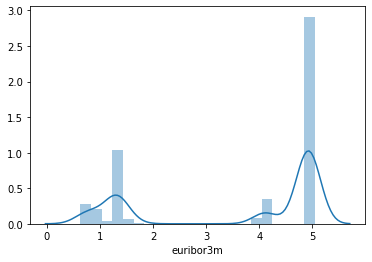

In [138]:
sns.distplot(loan['euribor3m'])
plt.show()

In [139]:
loan['euribor3m'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
95%          4.966000
99%          4.968000
max          5.045000
Name: euribor3m, dtype: float64

#### Number of employeees

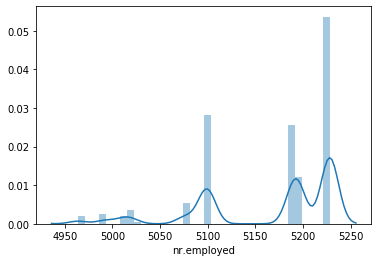

In [140]:
sns.distplot(loan['nr.employed'])
plt.show()

In [141]:
loan['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

In [142]:
loan['nr.employed'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
95%       5228.100000
99%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

Now that we have completed basic exploratory analysis, we can move to the next stage, that is data cleaning and data preparation

## Data Preparation

Once Exploratory Data anlysis has been performed, we move to data preparation for the purpose of modelling.

In [143]:
# inspect the columns

loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response', 'age_bins'],
      dtype='object')

In [144]:
# Droping the column age_bins we had created for the purpose of data visualisation

loan.drop(columns = 'age_bins', inplace = True)

In [145]:
# Creating a dummy variable for the variable 'job' and dropping the first one.

job = pd.get_dummies(loan['job'],prefix='job',drop_first=True)

#Adding the results to the master dataframe

loan = pd.concat([loan,job],axis=1)

In [146]:
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,0,1,0,0,0,0,0,0,0,0
1,57,services,married,Secondary_Education,unknown,no,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
2,37,services,married,Secondary_Education,no,yes,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
4,56,services,married,Secondary_Education,no,no,yes,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0


Notice that we have created a set of dummy columns for the feature job. Similarly, we are going to do the same for other categorical variables.

In [147]:
# Creating dummy variable for marital column

marital = pd.get_dummies(loan['marital'],prefix='marital',drop_first=True)
loan = pd.concat([loan,marital],axis=1)

In [148]:
# Creating dummy variable for education column

education = pd.get_dummies(loan['education'],prefix='education',drop_first=True)
loan = pd.concat([loan,education],axis=1)

In [149]:
# Creating dummy variable for default column

default = pd.get_dummies(loan['default'],prefix='default',drop_first=True)
loan = pd.concat([loan,default],axis=1)

In [150]:
# Creating dummy variable for housing column

housing = pd.get_dummies(loan['housing'],prefix='housing',drop_first=True)
loan = pd.concat([loan,housing],axis=1)

In [151]:
# Creating dummy variable for loan column

loan_v= pd.get_dummies(loan['loan'],prefix='loan',drop_first=True)
loan = pd.concat([loan,loan_v],axis=1)

In [152]:
# Creating dummy variable for contact column

contact = pd.get_dummies(loan['contact'],prefix='contact',drop_first=True)
loan = pd.concat([loan,contact],axis=1)

In [153]:
# Creating dummy variable for month column

month = pd.get_dummies(loan['month'],prefix='month',drop_first=True)
loan = pd.concat([loan,month],axis=1)

In [154]:
# Creating dummy variable for day_of_week column

day_of_week = pd.get_dummies(loan['day_of_week'],prefix='day_of_week',drop_first=True)
loan = pd.concat([loan,day_of_week],axis=1)

In [155]:
# Creating dummy variable for pdays column

pdays = pd.get_dummies(loan['pdays'],prefix='pdays',drop_first=True)
loan = pd.concat([loan,pdays],axis=1)

In [156]:
# Creating dummy variable for previous column

previous = pd.get_dummies(loan['previous'],prefix='previous',drop_first=True)
loan = pd.concat([loan,previous],axis=1)

In [157]:
# Creating dummy variable for poutcome column

poutcome = pd.get_dummies(loan['poutcome'],prefix='poutcome',drop_first=True)
loan = pd.concat([loan,poutcome],axis=1)

In [158]:
# inspect the dataframe

loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
1,57,services,married,Secondary_Education,unknown,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
2,37,services,married,Secondary_Education,no,yes,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
4,56,services,married,Secondary_Education,no,no,yes,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0


In [159]:
# Drop all features for whom dummy variable has been created

loan.drop(columns = ['job','marital','education','default','housing','loan','contact','month','day_of_week','pdays','previous','poutcome'], inplace=True)

In [160]:
# add column Prospect_ID id
loan['prospect_id'] = loan.index


In [161]:
loan.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,job_blue-collar,...,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success,prospect_id
0,56,261,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,0,1,0,1,1,0,0
1,57,149,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,0,1,0,1,1,0,1
2,37,226,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,0,1,0,1,1,0,2
3,40,151,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,0,1,0,1,1,0,3
4,56,307,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,0,1,0,1,1,0,4


## Test and train split for model building

In [162]:
# Import library to split the dataset into test and train
from sklearn.model_selection import train_test_split

In [163]:
# Putting feature variable to X 
X = loan.drop(['response','duration','prospect_id'],axis=1)

# Putting response variable to y
y = loan['response']

In [164]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

#### Standardisation

In [165]:
X_train.head()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
7019,31,4,1.1,93.994,-36.4,4.860,5191.0,0,0,0,...,0,1,0,0,0,1,0,1,1,0
27175,51,3,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,...,0,0,0,0,0,1,0,1,1,0
15817,39,3,1.4,93.918,-42.7,4.960,5228.1,0,0,0,...,1,0,0,0,0,1,0,1,1,0
40971,68,4,-1.1,94.601,-49.5,1.000,4963.6,0,0,0,...,1,0,0,0,0,1,0,0,0,0
8467,37,3,1.4,94.465,-41.8,4.864,5228.1,0,0,0,...,0,0,1,0,0,1,0,1,1,0


In [166]:
# Standardisation continuous features for X_train
X_train_df = X_train[['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

In [167]:
std_X_train_df=(X_train_df-X_train_df.mean())/X_train_df.std()

In [168]:
X_train = X_train.drop(['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], 1)

In [169]:
X_train = pd.concat([X_train,std_X_train_df],axis=1)

In [170]:
X_train.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,previous_Never contacted,poutcome_nonexistent,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
7019,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.877019,0.646930,0.649758,0.723298,0.891826,0.715448,0.333618
27175,0,0,0,0,0,0,0,0,1,0,...,1,1,0,1.084499,0.213946,-0.114599,-0.650827,-0.319720,0.231937,0.400051
15817,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.092412,0.213946,0.840847,0.591769,-0.471164,0.773077,0.847088
40971,0,0,0,0,1,0,0,0,0,0,...,0,0,0,2.751789,0.646930,-0.751563,1.773794,-1.942327,-1.509050,-2.813633
8467,0,0,0,0,0,0,0,0,1,0,...,1,1,0,-0.288564,0.213946,0.840847,1.538427,-0.276451,0.717753,0.847088


In [171]:
# Standardisation continuous features for X_test
X_test_df = X_test[['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

In [172]:
std_X_test_df=(X_test_df-X_test_df.mean())/X_test_df.std()

In [173]:
X_test = X_test.drop(['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], 1)

In [174]:
#X_test.set_index('Prospect_ID')
X_test = pd.concat([X_test,std_X_test_df],axis=1)

In [175]:
X_test.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,previous_Never contacted,poutcome_nonexistent,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
33148,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-1.182984,-0.651460,-1.199007,-1.172918,-1.237193,-1.348603,-0.944859
27585,0,0,0,0,0,0,0,0,1,0,...,1,1,0,0.100062,0.663413,-0.118526,-0.644728,-0.332420,0.226981,0.393573
15722,1,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.590809,-0.651460,0.834840,0.590583,-0.483215,0.768913,0.840640
40349,0,0,0,0,0,0,0,0,0,0,...,0,0,1,-1.182984,-0.213169,-1.135450,0.778116,0.464642,-1.574841,-2.432774
2576,0,0,0,0,0,0,1,0,0,0,...,1,1,0,1.481803,-0.213169,0.644167,0.721340,0.873944,0.708890,0.327136


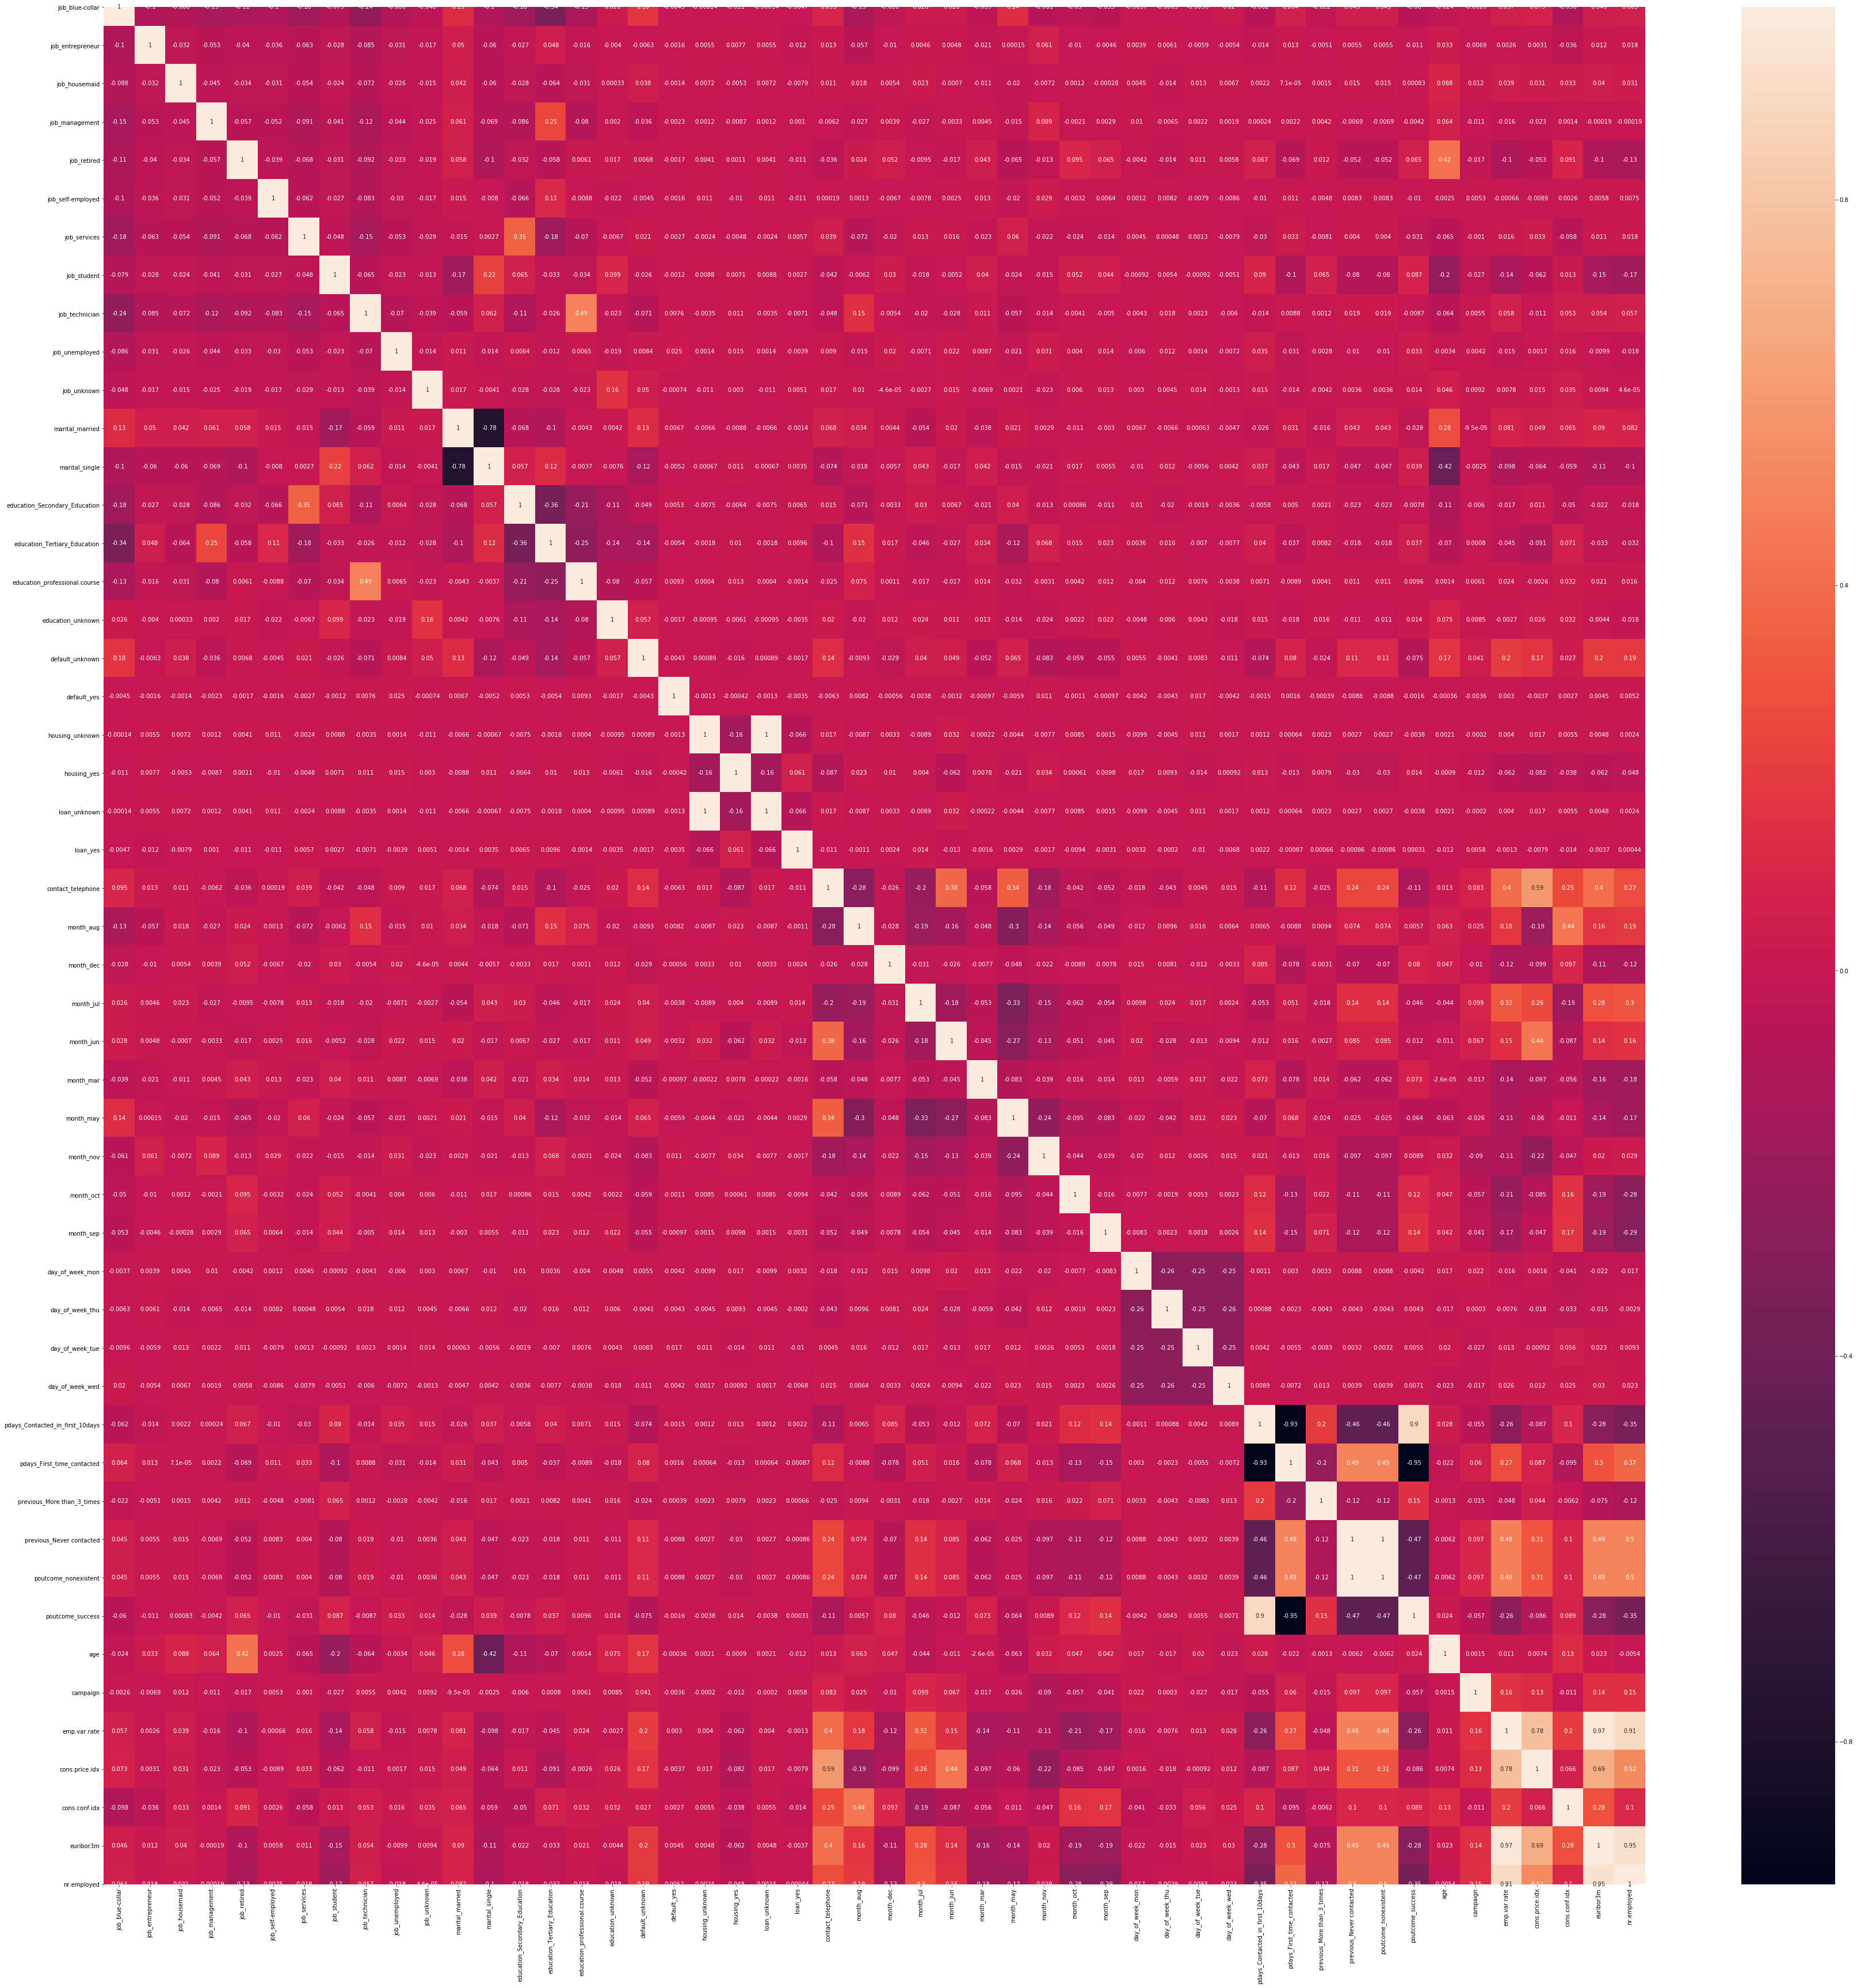

In [176]:
## In order to understand the correlation numerically for train set
## we need to prroduce the heat map to provide the directions going further
plt.figure(figsize = (60, 60))
sns.heatmap(X_train.corr(), annot = True)
plt.show()

In [177]:
# check class imbalance
y_train.value_counts()/y_train.shape

0    0.886997
1    0.113003
Name: response, dtype: float64

## Modelling

Now that the data preparation step is complete, we will jump straight into modelling
We will look at different logistic models

- Basic Logistic Regression with all variables
- Logistic Regression With PCA
- Logistic Regression With RFE

### Basic Logistic Regression with all variables

#### First training model using Basic Logistic Regression (with all variables)

In [178]:
import statsmodels.api as sm

In [179]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [180]:
# Fitting the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [181]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28782
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7933.3
Date:                Mon, 22 Jul 2019   Deviance:                       15867.
Time:                        19:59:03   Pearson chi2:                 2.92e+04
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.6435      0.284     -5.777      0.000      -2.201      -1.086
job_blue-collar                    -0.1547      0.083     -1.873      0.061      -0.317       0.007
job_entrepreneur                   -0.2347      0.132     -1.776      0.076      -0.494       0.024
job_housemaid                       0.0296      0.148      0.201      0.841      -0.260       0.319
job_management                     -0.1551      0.092     -1.690      0.091      -0.335       0.025
job_retired                         0.2281      0.110      2.071      0.038       0.012       0.444
job_self-employed                  -0.0586      0.121     -0.483      0.629      -0.297       0.179
job_services                       -0.0573      0.088     -0.649      0.516      -0.230       0.116
job_student                         0.2777      0.120      2.324      0.020       0.043       0.512
job_technician                     -0.0158      0.075     -0.211      0.833      -0.162       0.131
job_unemployed                     -0.0249      0.134     -0.186      0.853      -0.288       0.238
job_unknown                        -0.0977      0.241     -0.406      0.685      -0.569       0.374
marital_married                     0.0546      0.072      0.761      0.446      -0.086       0.195
marital_single                      0.1182      0.082      1.444      0.149      -0.042       0.279
education_Secondary_Education       0.0322      0.072      0.447      0.655      -0.109       0.174
education_Tertiary_Education        0.1214      0.073      1.663      0.096      -0.022       0.265
education_professional.course       0.0775      0.086      0.902      0.367      -0.091       0.246
education_unknown                   0.1810      0.109      1.663      0.096      -0.032       0.394
default_unknown                    -0.2785      0.070     -4.003      0.000      -0.415      -0.142
default_yes                       -17.5533   1.25e+04     -0.001      0.999   -2.45e+04    2.45e+04
housing_unknown                    -0.0493      0.071     -0.693      0.489      -0.189       0.090
housing_yes                        -0.0349      0.043     -0.809      0.419      -0.120       0.050
loan_unknown                       -0.0493      0.071     -0.693      0.489      -0.189       0.090
loan_yes                            0.0121      0.059      0.203      0.839      -0.104       0.128
contact_telephone                  -0.6338      0.079     -8.055      0.000      -0.788      -0.480
month_aug                           0.4285      0.128      3.346      0.001       0.178       0.679
month_dec                           0.2895      0.226      1.282      0.200      -0.153       0.732
month_jul                          -0.0148      0.100     -0.148      0.882      -0

### Logistic model with PCA

In [182]:
# import all libraries
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [183]:
# perform pca
pca = PCA()
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [184]:
# list of number of pca components with percentage variance
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      32.80
1      43.59
2      52.43
3      60.59
4      66.34
5      69.65
6      72.24
7      74.59
8      76.82
9      78.77
10     80.65
11     82.50
12     84.31
13     86.07
14     87.70
15     89.18
16     90.44
17     91.58
18     92.63
19     93.37
20     94.08
21     94.67
22     95.19
23     95.70
24     96.16
25     96.57
26     96.96
27     97.36
28     97.70
29     98.01
30     98.30
31     98.57
32     98.82
33     99.04
34     99.21
35     99.37
36     99.51
37     99.63
38     99.74
39     99.80
40     99.86
41     99.89
42     99.93
43     99.95
44     99.97
45     99.99
46    100.00
47    100.00
48    100.00
49    100.00
dtype: float64


In [185]:
# pca components
pca.components_

array([[-1.36741320e-02, -6.94924264e-04, -3.48588045e-03, ...,
        -1.29824382e-01, -5.12767548e-01, -4.76850776e-01],
       [-2.90476003e-02,  1.54950448e-03,  1.15320221e-02, ...,
         6.01471530e-01,  2.88590240e-02, -7.01185412e-02],
       [ 2.16271248e-02,  5.02101532e-03,  6.69433978e-03, ...,
        -3.53330273e-01, -8.42096673e-02, -2.54903663e-02],
       ...,
       [-5.47622511e-05,  9.54194521e-06, -4.55003380e-06, ...,
         3.03912323e-05, -1.52905712e-04,  1.08186626e-04],
       [-2.81611383e-17, -9.94339457e-17,  7.15836512e-17, ...,
         2.48408194e-17, -3.17996257e-17,  1.27310070e-16],
       [ 0.00000000e+00,  7.64707941e-17,  1.46841058e-16, ...,
         2.95426062e-17, -2.37133051e-16,  4.56304333e-16]])

In [186]:
# Data frame with pc1 and pc2
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.013674,-0.029048,job_blue-collar
1,-0.000695,0.001550,job_entrepreneur
2,-0.003486,0.011532,job_housemaid
3,0.001498,0.014450,job_management
4,0.009701,0.066912,job_retired


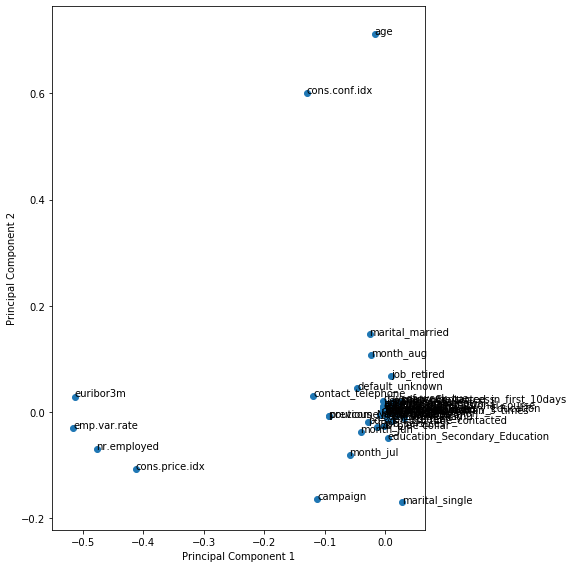

In [187]:
# Plot original features on the first 2 principal components as axes
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

#### Looking at the screeplot to assess the number of needed principal components

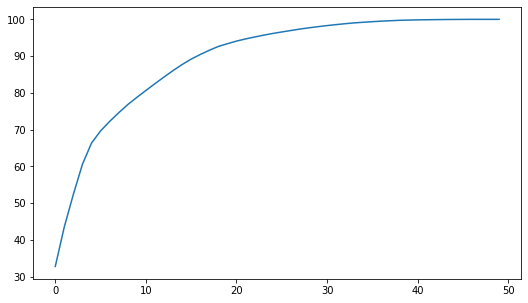

In [188]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

In [189]:
# create pipeline with pca components equal to 16
PCA_VARS = 16
steps = [("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [190]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8157885609240054

In [191]:
# make prediction on test data
y_pred = pipeline.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[9149 1826]
 [ 535  847]]
Sensitivity: 	0.61
Specificity: 	0.83
AUC:    	 0.78


In [192]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight='balanced')

# create pipeline
steps = [("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [16,17,18,19,20], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc')

In [193]:
# fit model
model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=Tr...
                                                           multi_class='warn',
                    

In [194]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.7846792700534339
Best hyperparameters:  {'logistic__C': 4, 'logistic__penalty': 'l2', 'pca__n_components': 18}


In [195]:
# make prediction on test data set with best hyperparameters
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[9150 1825]
 [ 537  845]]
Sensitivity: 	0.61
Specificity: 	0.83
AUC:    	 0.78


In [196]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.83      0.89     10975
           1       0.32      0.61      0.42      1382

    accuracy                           0.81     12357
   macro avg       0.63      0.72      0.65     12357
weighted avg       0.87      0.81      0.83     12357



### Logistic Regression With Recursive Feature Elimination (RFE)

In [197]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
## taking into account class imbalance
logreg = LogisticRegression(class_weight='balanced')

## running RFE with 15 variables as output
from sklearn.feature_selection import RFE
# Let's do RFE using 15 variables
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [198]:
rfe.support_

array([False, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
        True,  True,  True,  True, False, False, False, False, False,
       False, False,  True, False,  True, False,  True, False, False,
        True,  True, False,  True, False])

In [199]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('job_blue-collar', False, 22),
 ('job_entrepreneur', False, 14),
 ('job_housemaid', False, 30),
 ('job_management', False, 15),
 ('job_retired', True, 1),
 ('job_self-employed', False, 36),
 ('job_services', False, 27),
 ('job_student', True, 1),
 ('job_technician', False, 33),
 ('job_unemployed', False, 24),
 ('job_unknown', False, 26),
 ('marital_married', False, 29),
 ('marital_single', False, 13),
 ('education_Secondary_Education', False, 32),
 ('education_Tertiary_Education', False, 11),
 ('education_professional.course', False, 28),
 ('education_unknown', False, 10),
 ('default_unknown', False, 2),
 ('default_yes', False, 6),
 ('housing_unknown', False, 18),
 ('housing_yes', False, 25),
 ('loan_unknown', False, 8),
 ('loan_yes', False, 31),
 ('contact_telephone', True, 1),
 ('month_aug', True, 1),
 ('month_dec', True, 1),
 ('month_jul', False, 20),
 ('month_jun', True, 1),
 ('month_mar', True, 1),
 ('month_may', True, 1),
 ('month_nov', True, 1),
 ('month_oct', False, 19),
 ('m

In [200]:
## list of all the support variables
col = X_train.columns[rfe.support_]
col

Index(['job_retired', 'job_student', 'contact_telephone', 'month_aug',
       'month_dec', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'pdays_First_time_contacted', 'previous_Never contacted',
       'poutcome_success', 'emp.var.rate', 'cons.price.idx', 'euribor3m'],
      dtype='object')

In [201]:
## list of all rejected variables by RFE
X_train.columns[~rfe.support_]

Index(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_self-employed', 'job_services', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_Secondary_Education', 'education_Tertiary_Education',
       'education_professional.course', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'month_jul', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'pdays_Contacted_in_first_10days', 'previous_More than_3_times',
       'poutcome_nonexistent', 'age', 'campaign', 'cons.conf.idx',
       'nr.employed'],
      dtype='object')

In [202]:
## creating model and checking the summary for significance of all variables
X_train_sm = sm.add_constant(X_train[col])
logm15 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm15.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28815
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7996.2
Date:                Mon, 22 Jul 2019   Deviance:                       15992.
Time:                        20:02:12   Pearson chi2:                 2.86e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.5997      0.214     -7.491      0.000      -2.018      -1.181
job_retired                    0.3005      0.083      3.618      0.000       0.138       0.463
job_student                    0.3453      0.105      3.300      0.001       0.140       0.550
contact_telephone             -0.5621      0.069     -8.104      0.000      -0.698      -0.426
month_aug                      0.5244      0.079      6.664      0.000       0.370       0.679
month_dec                      0.2235      0.200      1.118      0.264      -0.168       0.615
month_jun                     -0.5861      0.082     -7.113      0.000      -0.748      -0.425
month_mar                      1.3324      0.119     11.233      0.000       1.100       1.565
month_may                     -0.5104      0.063     -8.053      0.000      -0.635      -0.386
month_nov                     -0.5495      0.086     -6.416      0.000      -0.717      -0.382
pdays_First_time_contacted    -0.9775      0.215     -4.553      0.000      -1.398      -0.557
previous_Never contacted       0.4829      0.067      7.202      0.000       0.351       0.614
poutcome_success               0.8937      0.218      4.100      0.000       0.466       1.321
emp.var.rate                  -2.4182      0.150    -16.160      0.000      -2.712      -2.125
cons.price.idx                 0.9775      0.057     17.193      0.000       0.866       1.089
euribor3m                      0.9999      0.125      8.021      0.000       0.756       1.244
==============================================================================================
"""

In [203]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7019     0.035036
27175    0.034457
15817    0.058623
40971    0.441669
8467     0.045025
21860    0.045158
11416    0.047439
27833    0.438706
26816    0.060700
28102    0.217690
dtype: float64

In [204]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.03503636, 0.03445711, 0.05862279, 0.44166872, 0.04502549,
       0.04515784, 0.04743895, 0.43870557, 0.06070004, 0.21769039])

##### Creating a dataframe with the actual response flag and the predicted probabilities

In [205]:
y_train_pred_final = pd.DataFrame({'actual_response':y_train.values, 'probability':y_train_pred})
y_train_pred_final['ProspectID'] = y_train.index
y_train_pred_final.head()

,actual_response,probability,ProspectID
0,0,0.035036,7019
1,0,0.034457,27175
2,0,0.058623,15817
3,0,0.441669,40971
4,0,0.045025,8467


##### Creating new column 'predicted' with 1 if probability > 0.5 else 0

In [206]:
y_train_pred_final['predicted'] = y_train_pred_final.probability.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,actual_response,probability,ProspectID,predicted
0,0,0.035036,7019,0
1,0,0.034457,27175,0
2,0,0.058623,15817,0
3,0,0.441669,40971,0
4,0,0.045025,8467,0


In [207]:
from sklearn import metrics

In [208]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.actual_response, y_train_pred_final.predicted )
print(confusion)

[[25191   382]
 [ 2513   745]]


In [209]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.actual_response, y_train_pred_final.predicted))

0.8995872498352467


In [210]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [211]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,emp.var.rate,76.15
14,euribor3m,51.33
9,pdays_First_time_contacted,14.84
10,previous_Never contacted,11.93
13,cons.price.idx,11.40
2,contact_telephone,4.78
7,month_may,3.37
3,month_aug,2.57
5,month_jun,2.32
8,month_nov,1.94


In [212]:
col = col.drop('emp.var.rate', 1)
col

Index(['job_retired', 'job_student', 'contact_telephone', 'month_aug',
       'month_dec', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'pdays_First_time_contacted', 'previous_Never contacted',
       'poutcome_success', 'cons.price.idx', 'euribor3m'],
      dtype='object')

In [213]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28816
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8122.8
Date:                Mon, 22 Jul 2019   Deviance:                       16246.
Time:                        20:02:58   Pearson chi2:                 3.06e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.5000      0.211     -7.103      0.000      -1.914      -1.086
job_retired                    0.4211      0.081      5.179      0.000       0.262       0.581
job_student                    0.4274      0.103      4.155      0.000       0.226       0.629
contact_telephone             -0.1959      0.063     -3.120      0.002      -0.319      -0.073
month_aug                      0.0689      0.071      0.966      0.334      -0.071       0.209
month_dec                      0.4451      0.198      2.245      0.025       0.056       0.834
month_jun                      0.0338      0.074      0.459      0.646      -0.111       0.178
month_mar                      0.8171      0.115      7.081      0.000       0.591       1.043
month_may                     -0.9016      0.058    -15.549      0.000      -1.015      -0.788
month_nov                     -0.0627      0.079     -0.791      0.429      -0.218       0.093
pdays_First_time_contacted    -1.1613      0.212     -5.479      0.000      -1.577      -0.746
previous_Never contacted       0.4763      0.065      7.275      0.000       0.348       0.605
poutcome_success               0.8139      0.215      3.784      0.000       0.392       1.235
cons.price.idx                 0.1770      0.027      6.612      0.000       0.125       0.230
euribor3m                     -0.9622      0.030    -32.528      0.000      -1.020      -0.904
==============================================================================================
"""

In [214]:
# make prediction on train data set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [215]:
y_train_pred[:10]

array([0.02098137, 0.0583028 , 0.05603383, 0.38364493, 0.05922463,
       0.05202103, 0.05635676, 0.37861515, 0.0680761 , 0.24009664])

In [216]:
y_train_pred_final['probability'] = y_train_pred

In [217]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,actual_response,probability,ProspectID,predicted
0,0,0.020981,7019,0
1,0,0.058303,27175,0
2,0,0.056034,15817,0
3,0,0.383645,40971,0
4,0,0.059225,8467,0


In [218]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.actual_response, y_train_pred_final.predicted))

0.8994485102840692


##### Let's check the VIFs again

In [219]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,pdays_First_time_contacted,14.54
10,previous_Never contacted,11.92
12,cons.price.idx,4.04
2,contact_telephone,3.82
13,euribor3m,3.66
7,month_may,3.21
5,month_jun,2.09
3,month_aug,2.02
8,month_nov,1.67
11,poutcome_success,1.30


In [220]:
# Let's drop month_jun since it has a high p value
col = col.drop('month_jun')
col

Index(['job_retired', 'job_student', 'contact_telephone', 'month_aug',
       'month_dec', 'month_mar', 'month_may', 'month_nov',
       'pdays_First_time_contacted', 'previous_Never contacted',
       'poutcome_success', 'cons.price.idx', 'euribor3m'],
      dtype='object')

In [221]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm13 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm13.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28817
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8122.9
Date:                Mon, 22 Jul 2019   Deviance:                       16246.
Time:                        20:03:43   Pearson chi2:                 3.05e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.4949      0.211     -7.089      0.000      -1.908      -1.082
job_retired                    0.4193      0.081      5.163      0.000       0.260       0.579
job_student                    0.4269      0.103      4.150      0.000       0.225       0.629
contact_telephone             -0.1867      0.059     -3.142      0.002      -0.303      -0.070
month_aug                      0.0628      0.070      0.896      0.370      -0.074       0.200
month_dec                      0.4384      0.198      2.217      0.027       0.051       0.826
month_mar                      0.8099      0.114      7.084      0.000       0.586       1.034
month_may                     -0.9102      0.055    -16.597      0.000      -1.018      -0.803
month_nov                     -0.0694      0.078     -0.891      0.373      -0.222       0.083
pdays_First_time_contacted    -1.1602      0.212     -5.474      0.000      -1.576      -0.745
previous_Never contacted       0.4766      0.065      7.280      0.000       0.348       0.605
poutcome_success               0.8158      0.215      3.793      0.000       0.394       1.237
cons.price.idx                 0.1782      0.027      6.690      0.000       0.126       0.230
euribor3m                     -0.9627      0.030    -32.600      0.000      -1.021      -0.905
==============================================================================================
"""

In [222]:
# make prediction on train data set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [223]:
y_train_pred[:10]

array([0.02113979, 0.05875278, 0.05639887, 0.38536865, 0.05830614,
       0.0520104 , 0.05547861, 0.3782727 , 0.06800908, 0.24123024])

In [224]:
y_train_pred_final['probability'] = y_train_pred

In [225]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,actual_response,probability,ProspectID,predicted
0,0,0.021140,7019,0
1,0,0.058753,27175,0
2,0,0.056399,15817,0
3,0,0.385369,40971,0
4,0,0.058306,8467,0


In [226]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.actual_response, y_train_pred_final.predicted))

0.8993791405084804


In [227]:
# Let's check vif again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,pdays_First_time_contacted,14.04
9,previous_Never contacted,11.92
11,cons.price.idx,3.81
12,euribor3m,3.39
2,contact_telephone,3.24
6,month_may,2.45
3,month_aug,2.01
7,month_nov,1.65
10,poutcome_success,1.30
0,job_retired,1.07


In [228]:
# Let's drop month_nov since it has a high p value
col = col.drop('month_nov')
col

Index(['job_retired', 'job_student', 'contact_telephone', 'month_aug',
       'month_dec', 'month_mar', 'month_may', 'pdays_First_time_contacted',
       'previous_Never contacted', 'poutcome_success', 'cons.price.idx',
       'euribor3m'],
      dtype='object')

In [229]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm12.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28818
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8123.3
Date:                Mon, 22 Jul 2019   Deviance:                       16247.
Time:                        20:03:50   Pearson chi2:                 3.05e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.5234      0.208     -7.307      0.000      -1.932      -1.115
job_retired                    0.4193      0.081      5.162      0.000       0.260       0.579
job_student                    0.4265      0.103      4.144      0.000       0.225       0.628
contact_telephone             -0.1838      0.059     -3.097      0.002      -0.300      -0.067
month_aug                      0.0814      0.067      1.216      0.224      -0.050       0.212
month_dec                      0.4527      0.197      2.298      0.022       0.067       0.839
month_mar                      0.8209      0.114      7.219      0.000       0.598       1.044
month_may                     -0.8977      0.053    -16.920      0.000      -1.002      -0.794
pdays_First_time_contacted    -1.1505      0.212     -5.435      0.000      -1.565      -0.736
previous_Never contacted       0.4814      0.065      7.380      0.000       0.354       0.609
poutcome_success               0.8228      0.215      3.827      0.000       0.401       1.244
cons.price.idx                 0.1845      0.026      7.187      0.000       0.134       0.235
euribor3m                     -0.9698      0.028    -34.103      0.000      -1.025      -0.914
==============================================================================================
"""

In [230]:
# make prediction on train data set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [231]:
y_train_pred[:10]

array([0.02115877, 0.06173013, 0.05556873, 0.38608063, 0.05795033,
       0.05189736, 0.05511902, 0.3775639 , 0.07121437, 0.23926415])

In [232]:
y_train_pred_final['probability'] = y_train_pred

In [233]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,actual_response,probability,ProspectID,predicted
0,0,0.021159,7019,0
1,0,0.061730,27175,0
2,0,0.055569,15817,0
3,0,0.386081,40971,0
4,0,0.057950,8467,0


In [234]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.actual_response, y_train_pred_final.predicted))

0.8992057160695085


In [235]:
# Let's check vif again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,pdays_First_time_contacted,12.41
8,previous_Never contacted,11.74
2,contact_telephone,3.23
10,cons.price.idx,3.03
11,euribor3m,2.89
6,month_may,2.16
3,month_aug,1.64
9,poutcome_success,1.21
0,job_retired,1.07
1,job_student,1.06


In [236]:
# Let's drop month_aug since it has a high p value
col = col.drop('month_aug')
col

Index(['job_retired', 'job_student', 'contact_telephone', 'month_dec',
       'month_mar', 'month_may', 'pdays_First_time_contacted',
       'previous_Never contacted', 'poutcome_success', 'cons.price.idx',
       'euribor3m'],
      dtype='object')

In [237]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28819
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8124.0
Date:                Mon, 22 Jul 2019   Deviance:                       16248.
Time:                        20:03:55   Pearson chi2:                 3.06e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.4913      0.207     -7.217      0.000      -1.896      -1.086
job_retired                    0.4246      0.081      5.236      0.000       0.266       0.584
job_student                    0.4323      0.103      4.208      0.000       0.231       0.634
contact_telephone             -0.1886      0.059     -3.186      0.001      -0.305      -0.073
month_dec                      0.4347      0.197      2.212      0.027       0.049       0.820
month_mar                      0.8079      0.113      7.139      0.000       0.586       1.030
month_may                     -0.9121      0.052    -17.650      0.000      -1.013      -0.811
pdays_First_time_contacted    -1.1649      0.211     -5.516      0.000      -1.579      -0.751
previous_Never contacted       0.4809      0.065      7.380      0.000       0.353       0.609
poutcome_success               0.8171      0.215      3.805      0.000       0.396       1.238
cons.price.idx                 0.1753      0.025      7.143      0.000       0.127       0.223
euribor3m                     -0.9600      0.027    -35.165      0.000      -1.014      -0.907
==============================================================================================
"""

In [238]:
# make prediction on train data set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [239]:
y_train_pred[:10]

array([0.0211238 , 0.06293205, 0.05658747, 0.38419714, 0.05823806,
       0.0492767 , 0.05542141, 0.37867232, 0.07293036, 0.24165186])

In [240]:
y_train_pred_final['probability'] = y_train_pred

In [241]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,actual_response,probability,ProspectID,predicted
0,0,0.021124,7019,0
1,0,0.062932,27175,0
2,0,0.056587,15817,0
3,0,0.384197,40971,0
4,0,0.058238,8467,0


In [242]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.actual_response, y_train_pred_final.predicted))

0.8991363462939197


In [243]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,pdays_First_time_contacted,12.07
7,previous_Never contacted,11.72
2,contact_telephone,3.20
9,cons.price.idx,2.66
10,euribor3m,2.48
5,month_may,2.07
8,poutcome_success,1.15
0,job_retired,1.07
4,month_mar,1.06
1,job_student,1.05


In [244]:
# Let's drop pdays_First_time_contacted since it has a high VIF
col = col.drop('pdays_First_time_contacted')
col

Index(['job_retired', 'job_student', 'contact_telephone', 'month_dec',
       'month_mar', 'month_may', 'previous_Never contacted',
       'poutcome_success', 'cons.price.idx', 'euribor3m'],
      dtype='object')

In [245]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28820
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8138.8
Date:                Mon, 22 Jul 2019   Deviance:                       16278.
Time:                        20:04:01   Pearson chi2:                 3.06e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.5809      0.064    -40.426      0.000      -2.706      -2.456
job_retired                  0.4274      0.081      5.280      0.000       0.269       0.586
job_student                  0.4627      0.102      4.531      0.000       0.263       0.663
contact_telephone           -0.1925      0.059     -3.251      0.001      -0.308      -0.076
month_dec                    0.4243      0.196      2.164      0.030       0.040       0.809
month_mar                    0.8102      0.113      7.179      0.000       0.589       1.031
month_may                   -0.9224      0.052    -17.871      0.000      -1.024      -0.821
previous_Never contacted     0.4070      0.063      6.486      0.000       0.284       0.530
poutcome_success             1.8995      0.090     21.201      0.000       1.724       2.075
cons.price.idx               0.1846      0.024      7.542      0.000       0.137       0.233
euribor3m                   -0.9683      0.027    -35.566      0.000      -1.022      -0.915
============================================================================================
"""

In [246]:
# make prediction on train data set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [247]:
y_train_pred[:10]

array([0.02087454, 0.06231818, 0.05660819, 0.40977475, 0.05855242,
       0.04894037, 0.05569756, 0.37898111, 0.07246839, 0.24230712])

In [248]:
y_train_pred_final['probability'] = y_train_pred

In [249]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,actual_response,probability,ProspectID,predicted
0,0,0.020875,7019,0
1,0,0.062318,27175,0
2,0,0.056608,15817,0
3,0,0.409775,40971,0
4,0,0.058552,8467,0


In [250]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.actual_response, y_train_pred_final.predicted))

0.899240400957303


In [251]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,contact_telephone,3.15
8,cons.price.idx,2.63
9,euribor3m,2.38
6,previous_Never contacted,2.06
5,month_may,2.03
7,poutcome_success,1.13
0,job_retired,1.06
4,month_mar,1.06
1,job_student,1.05
3,month_dec,1.03


In [252]:
# Let's drop month_dec since it has a high p value
col = col.drop('month_dec')
col

Index(['job_retired', 'job_student', 'contact_telephone', 'month_mar',
       'month_may', 'previous_Never contacted', 'poutcome_success',
       'cons.price.idx', 'euribor3m'],
      dtype='object')

In [253]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28821
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8141.1
Date:                Mon, 22 Jul 2019   Deviance:                       16282.
Time:                        20:04:08   Pearson chi2:                 3.07e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.5779      0.064    -40.418      0.000      -2.703      -2.453
job_retired                  0.4339      0.081      5.370      0.000       0.276       0.592
job_student                  0.4654      0.102      4.561      0.000       0.265       0.665
contact_telephone           -0.1845      0.059     -3.123      0.002      -0.300      -0.069
month_mar                    0.7987      0.113      7.085      0.000       0.578       1.020
month_may                   -0.9323      0.051    -18.139      0.000      -1.033      -0.832
previous_Never contacted     0.4048      0.063      6.457      0.000       0.282       0.528
poutcome_success             1.9043      0.090     21.275      0.000       1.729       2.080
cons.price.idx               0.1799      0.024      7.383      0.000       0.132       0.228
euribor3m                   -0.9710      0.027    -35.707      0.000      -1.024      -0.918
============================================================================================
"""

In [254]:
# make prediction on train data set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [255]:
y_train_pred[:10]

array([0.02074446, 0.06297904, 0.05639208, 0.41101775, 0.05853188,
       0.04893176, 0.05567035, 0.3786001 , 0.07268127, 0.24380489])

In [256]:
y_train_pred_final['probability'] = y_train_pred

In [257]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,actual_response,probability,ProspectID,predicted
0,0,0.020744,7019,0
1,0,0.062979,27175,0
2,0,0.056392,15817,0
3,0,0.411018,40971,0
4,0,0.058532,8467,0


In [258]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.actual_response, y_train_pred_final.predicted))

0.8993444556206861


In [259]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,contact_telephone,3.12
7,cons.price.idx,2.61
8,euribor3m,2.37
5,previous_Never contacted,2.06
4,month_may,2.02
6,poutcome_success,1.13
0,job_retired,1.06
3,month_mar,1.06
1,job_student,1.05


In [260]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.actual_response, y_train_pred_final.predicted )
confusion

array([[25275,   298],
       [ 2604,   654]])

In [261]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.actual_response, y_train_pred_final.predicted)

0.8993444556206861

#### Let's calculate some more metrics beyond simply accuracy

In [262]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [263]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.2007366482504604

In [264]:
# Let us calculate specificity
TN / float(TN+FP)

0.9883470848160169

In [265]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.011652915183983106


In [266]:
# positive predictive value 
print (TP / float(TP+FP))

0.6869747899159664


In [267]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9065963628537609


#### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [268]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [269]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.actual_response, y_train_pred_final.probability, drop_intermediate = False )

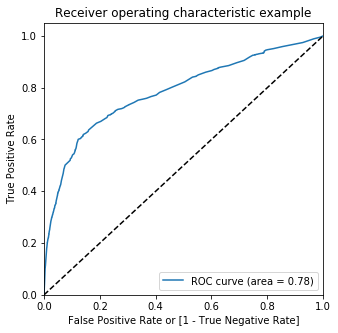

In [270]:
draw_roc(y_train_pred_final.actual_response, y_train_pred_final.probability)

#### Finding Optimal Cutoff Point

In [271]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,actual_response,probability,ProspectID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.020744,7019,0,1,0,0,0,0,0,0,0,0,0
1,0,0.062979,27175,0,1,0,0,0,0,0,0,0,0,0
2,0,0.056392,15817,0,1,0,0,0,0,0,0,0,0,0
3,0,0.411018,40971,0,1,1,1,1,1,0,0,0,0,0
4,0,0.058532,8467,0,1,0,0,0,0,0,0,0,0,0


In [272]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.actual_response, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.113003  1.000000  0.000000
0.1   0.1  0.758420  0.694598  0.766551
0.2   0.2  0.849121  0.583487  0.882962
0.3   0.3  0.888419  0.376304  0.953662
0.4   0.4  0.898165  0.241559  0.981817
0.5   0.5  0.899344  0.200737  0.988347
0.6   0.6  0.898824  0.172805  0.991319
0.7   0.7  0.895529  0.109269  0.995699
0.8   0.8  0.889598  0.030387  0.999062
0.9   0.9  0.886997  0.000000  1.000000


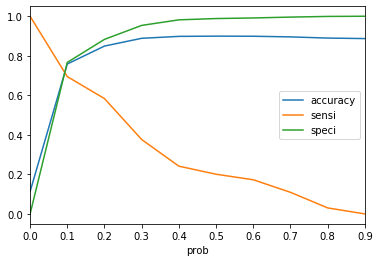

In [273]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### let's make prediction using cut off point equal to 0.1 on train data set

In [274]:
# let's make prediction using cut off point equal to 0.1
y_train_pred_final['final_predicted'] = y_train_pred_final.probability.map( lambda x: 1 if x > 0.1 else 0)
y_train_pred_final.head()

,actual_response,probability,ProspectID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.020744,7019,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.062979,27175,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.056392,15817,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.411018,40971,0,1,1,1,1,1,0,0,0,0,0,1
4,0,0.058532,8467,0,1,0,0,0,0,0,0,0,0,0,0


In [275]:
# Let's check the overall accuracy with cut off point equal to 0.1
metrics.accuracy_score(y_train_pred_final.actual_response, y_train_pred_final.final_predicted)

0.7584197565120877

In [276]:
# let's check confusion matrix with cut off point equal to 0.1
confusion2 = metrics.confusion_matrix(y_train_pred_final.actual_response, y_train_pred_final.final_predicted )
confusion2

array([[19603,  5970],
       [  995,  2263]])

In [277]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [278]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.694597912829957

In [279]:
# Let us calculate specificity
TN / float(TN+FP)

0.7665506588980565

In [280]:
# Calculate false postive rate - 
#predicting positive reponse when customer have not responded positive
print(FP/ float(TN+FP))

0.23344934110194346


In [281]:
# Positive predictive value 
print (TP / float(TP+FP))

0.2748694279120612


In [282]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9516943392562385


#### Precision and Recall

In [283]:
from sklearn.metrics import precision_score, recall_score

In [284]:
# Precision
precision_score(y_train_pred_final.actual_response, y_train_pred_final.final_predicted)

0.2748694279120612

In [285]:
# Recall
recall_score(y_train_pred_final.actual_response, y_train_pred_final.final_predicted)

0.694597912829957

#### Precision and recall tradeoff

In [286]:
from sklearn.metrics import precision_recall_curve

In [287]:
y_train_pred_final.actual_response, y_train_pred_final.final_predicted

(0        0
 1        0
 2        0
 3        0
 4        0
         ..
 28826    0
 28827    0
 28828    0
 28829    0
 28830    0
 Name: actual_response, Length: 28831, dtype: int64, 0        0
 1        0
 2        0
 3        1
 4        0
         ..
 28826    0
 28827    0
 28828    0
 28829    0
 28830    1
 Name: final_predicted, Length: 28831, dtype: int64)

In [288]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.actual_response, y_train_pred_final.probability)

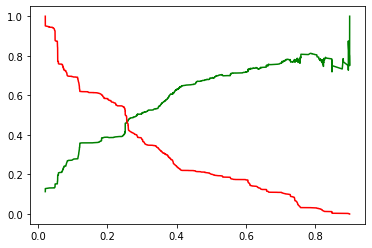

In [289]:
# precision and recall trade off plot
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Making predictions on the test set

In [290]:
X_test_df = X_test[col]
X_test_df.head()

,job_retired,job_student,contact_telephone,month_mar,month_may,previous_Never contacted,poutcome_success,cons.price.idx,euribor3m
33148,0,0,0,0,1,1,0,-1.172918,-1.348603
27585,0,0,0,0,0,1,0,-0.644728,0.226981
15722,0,0,0,0,0,1,0,0.590583,0.768913
40349,0,0,0,0,0,0,1,0.778116,-1.574841
2576,0,0,1,0,1,1,0,0.721340,0.708890


In [291]:
X_test_sm = sm.add_constant(X_test_df)

In [292]:
# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)

In [293]:
y_test_pred[:10]

33148    0.118474
27585    0.075193
15722    0.056596
40349    0.730157
2576     0.020867
33359    0.118474
26890    0.073077
8032     0.058662
13180    0.056536
10102    0.055849
dtype: float64

In [294]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [295]:
# Let's see the head
y_pred_1.head()

,0
33148,0.118474
27585,0.075193
15722,0.056596
40349,0.730157
2576,0.020867


In [296]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [297]:
# Putting prospect_id to index
y_test_df['prospect_id'] = y_test_df.index

In [298]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [299]:
y_pred_final.head()

,response,prospect_id,0
33148,0,33148,0.118474
27585,0,27585,0.075193
15722,0,15722,0.056596
40349,1,40349,0.730157
2576,0,2576,0.020867


In [300]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'predicted_probability', 'response' : 'actual_response'})

In [301]:
# Let's see the head of y_pred_final
y_pred_final.head()

,actual_response,prospect_id,predicted_probability
33148,0,33148,0.118474
27585,0,27585,0.075193
15722,0,15722,0.056596
40349,1,40349,0.730157
2576,0,2576,0.020867


In [302]:
y_pred_final['predicted_response'] = y_pred_final.predicted_probability.map(lambda x: 1 if x > 0.1 else 0)

In [303]:
y_pred_final.head()

,actual_response,prospect_id,predicted_probability,predicted_response
33148,0,33148,0.118474,1
27585,0,27585,0.075193,0
15722,0,15722,0.056596,0
40349,1,40349,0.730157,1
2576,0,2576,0.020867,0


In [304]:
# Let's check the overall accuracy for test data set
metrics.accuracy_score(y_pred_final.actual_response, y_pred_final.predicted_response)

0.7514768956866553

In [305]:
# Let's check confusion matrix for test data set
confusion2 = metrics.confusion_matrix(y_pred_final.actual_response, y_pred_final.predicted_response )
confusion2

array([[8349, 2626],
       [ 445,  937]])

In [306]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [307]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6780028943560058

In [308]:
# Let us calculate specificity
TN / float(TN+FP)

0.7607289293849658

In [309]:
# precision
precision_score(y_pred_final.actual_response, y_pred_final.predicted_response)

0.2629806342969408

In [310]:
# recall
recall_score(y_pred_final.actual_response, y_pred_final.predicted_response)

0.6780028943560058

## Results based on test data set 

### 1) Create a data frame with the variables prospect ID, actual response, predicted response, predicted probability of response, duration of the call in seconds and cost of the call

In [311]:
# join duration column from loan data set to predicted values test data set
y_test_pred_final = y_pred_final.join(loan['duration'])

In [312]:
# let's see head
y_test_pred_final.head()

,actual_response,prospect_id,predicted_probability,predicted_response,duration
33148,0,33148,0.118474,1,52
27585,0,27585,0.075193,0,407
15722,0,15722,0.056596,0,177
40349,1,40349,0.730157,1,187
2576,0,2576,0.020867,0,165


#### create new column for cost of the call

In [313]:
y_test_pred_final['cost_of_call'] = y_test_pred_final['duration'].apply(
                                lambda x : x/60 if x % 60 == 0 else (x//60 + 1))

In [314]:
y_test_pred_final.head()

,actual_response,prospect_id,predicted_probability,predicted_response,duration,cost_of_call
33148,0,33148,0.118474,1,52,1.0
27585,0,27585,0.075193,0,407,7.0
15722,0,15722,0.056596,0,177,3.0
40349,1,40349,0.730157,1,187,4.0
2576,0,2576,0.020867,0,165,3.0


### 2)  Find the number of top X% prospects you should target to meet the business objective

In [315]:
# create decile data frame from y_test_pred_final
decile_df = pd.DataFrame(y_test_pred_final)
decile_df.head()

,actual_response,prospect_id,predicted_probability,predicted_response,duration,cost_of_call
33148,0,33148,0.118474,1,52,1.0
27585,0,27585,0.075193,0,407,7.0
15722,0,15722,0.056596,0,177,3.0
40349,1,40349,0.730157,1,187,4.0
2576,0,2576,0.020867,0,165,3.0


In [316]:
# create decile column with decile values
decile_df['decile'] = pd.qcut(decile_df['predicted_probability'], 10, labels=np.arange(10, 0, -1))
decile_df.head()

,actual_response,prospect_id,predicted_probability,predicted_response,duration,cost_of_call,decile
33148,0,33148,0.118474,1,52,1.0,3
27585,0,27585,0.075193,0,407,7.0,4
15722,0,15722,0.056596,0,177,3.0,5
40349,1,40349,0.730157,1,187,4.0,1
2576,0,2576,0.020867,0,165,3.0,9


In [317]:
# group by decile dataframe to create lift dataframe
lift_df = decile_df.groupby('decile')['predicted_probability'].count().reset_index()
lift_df.head()

,decile,predicted_probability
0,10,1642
1,9,878
2,8,1316
3,7,1298
4,6,1055


In [318]:
# rename column predicted_probability to total
lift_df.rename({'predicted_probability':'total'}, axis=1, inplace=True)
lift_df.head()

,decile,total
0,10,1642
1,9,878
2,8,1316
3,7,1298
4,6,1055


In [319]:
# calculate response count for each decile
lift_df_pred = decile_df[decile_df['actual_response']==1].groupby('decile')['actual_response'].count().reset_index()
lift_df_pred.head()

,decile,actual_response
0,10,44
1,9,31
2,8,88
3,7,53
4,6,73


In [320]:
lift_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
decile    10 non-null category
total     10 non-null int64
dtypes: category(1), int64(1)
memory usage: 618.0 bytes


In [321]:
# merge lift_df and lift_df_pred
lift_df_final = lift_df.merge(lift_df_pred,on = 'decile')
lift_df_final.head()

,decile,total,actual_response
0,10,1642,44
1,9,878,31
2,8,1316,88
3,7,1298,53
4,6,1055,73


In [322]:
# sort the data 
lift_df_final = lift_df_final.sort_values(['decile'], ascending=False)
lift_df_final.head()

,decile,total,actual_response
9,1,1235,582
8,2,1213,252
7,3,1239,114
6,4,1186,65
5,5,1295,80


In [323]:
# create cummulative response column
lift_df_final['cumresp'] = lift_df_final['actual_response'].cumsum()
lift_df_final.head()

,decile,total,actual_response,cumresp
9,1,1235,582,582
8,2,1213,252,834
7,3,1239,114,948
6,4,1186,65,1013
5,5,1295,80,1093


In [324]:
# create gain column
lift_df_final['gain'] = 100*(lift_df_final['cumresp']/sum(lift_df_final['actual_response']))
lift_df_final.head()

,decile,total,actual_response,cumresp,gain
9,1,1235,582,582,42.112880
8,2,1213,252,834,60.347323
7,3,1239,114,948,68.596237
6,4,1186,65,1013,73.299566
5,5,1295,80,1093,79.088278


In [325]:
# create cummulative lift column
lift_df_final['cumlift'] = lift_df_final['gain']/(lift_df_final['decile'].astype('int')*(100/10))

In [326]:
# check data det
lift_df_final

,decile,total,actual_response,cumresp,gain,cumlift
9,1,1235,582,582,42.112880,4.211288
8,2,1213,252,834,60.347323,3.017366
7,3,1239,114,948,68.596237,2.286541
6,4,1186,65,1013,73.299566,1.832489
5,5,1295,80,1093,79.088278,1.581766
4,6,1055,73,1166,84.370478,1.406175
3,7,1298,53,1219,88.205499,1.260079
2,8,1316,88,1307,94.573082,1.182164
1,9,878,31,1338,96.816208,1.075736
0,10,1642,44,1382,100.000000,1.000000


#### Report the average call duration for targeting the top X% prospects to the CMO

In [327]:
# Let's see mean for call duration in each decile
average_call_duration = decile_df.groupby('decile')['duration'].mean().reset_index()
average_call_duration = average_call_duration.sort_values(['decile'], ascending=False)

In [328]:
# Let's calculate cummulative mean for each decile
average_call_duration['cum_mean_dur'] = average_call_duration['duration'].cumsum()
average_call_duration

,decile,duration,cum_mean_dur
9,1,290.775709,290.775709
8,2,266.281121,557.056830
7,3,254.699758,811.756588
6,4,236.393761,1048.150348
5,5,263.711197,1311.861545
4,6,259.532701,1571.394246
3,7,217.378274,1788.772521
2,8,238.923252,2027.695773
1,9,239.438497,2267.134270
0,10,254.906212,2522.040481


In [329]:
# Let's see sum for call duration in each decile
sum_call_duration = decile_df.groupby('decile')['duration'].sum().reset_index()
sum_call_duration = sum_call_duration.sort_values(['decile'], ascending=False)

In [330]:
# Let's calculate cummulative sum for each decile
sum_call_duration['cum_sum_dur'] = sum_call_duration['duration'].cumsum()
sum_call_duration

,decile,duration,cum_sum_dur
9,1,359108,359108
8,2,322999,682107
7,3,315573,997680
6,4,280363,1278043
5,5,341506,1619549
4,6,273807,1893356
3,7,282157,2175513
2,8,314423,2489936
1,9,210227,2700163
0,10,418556,3118719


In [331]:
# check number of prospects in test data set
X_test.shape

(12357, 50)

### Create a lift chart

Text(0, 0.5, 'gain')

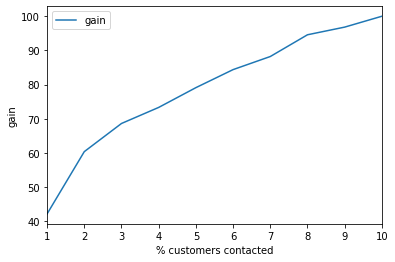

In [332]:
# decile and gain chart
lift_df_final.plot.line(x='decile', y=['gain'])
plt.xlabel('% customers contacted')
plt.ylabel('gain')

Text(0, 0.5, 'lift')

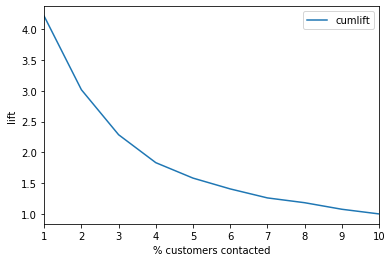

In [333]:
# decile and lift chart
lift_df_final.plot.line(x='decile', y=['cumlift'])
plt.xlabel('% customers contacted')
plt.ylabel('lift')

### Determine the cost of acquisition

##### As per the formula given above, the cost will be equal to
cost = 1* (60 % of 12357) = 7414.2

##### And if we consider average duration of call and cost of the call based on data available, then acquisition cost will be equal to 

cost = (duration of call) * (cost of call) * (number of contacts made)

## Results based on Entire data set

#### Check predicted values dataframe for train data set

In [334]:
# let's look at the predicted values dataframe for train data set
y_train_pred_final.head()

,actual_response,probability,ProspectID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.020744,7019,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.062979,27175,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.056392,15817,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.411018,40971,0,1,1,1,1,1,0,0,0,0,0,1
4,0,0.058532,8467,0,1,0,0,0,0,0,0,0,0,0,0


In [335]:
# let's drop unneccessary columns from y_train_pred_final
y_train_pred_final = y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,'predicted'], 1)

# And rename column names to match with test predicted values dataframe
y_train_pred_final= y_train_pred_final.rename(columns={ 'ProspectID' : 'prospect_id', 'probability' : 'predicted_probability', 'final_predicted' : 'predicted_response'})
y_train_pred_final.head()

,actual_response,predicted_probability,prospect_id,predicted_response
0,0,0.020744,7019,0
1,0,0.062979,27175,0
2,0,0.056392,15817,0
3,0,0.411018,40971,1
4,0,0.058532,8467,0


In [336]:
# Let's change the sequence of columns for y_train_pred_final
y_train_pred_final = y_train_pred_final[['prospect_id', 'actual_response', 'predicted_probability', 'predicted_response']]

In [337]:
y_train_pred_final.head()

,prospect_id,actual_response,predicted_probability,predicted_response
0,7019,0,0.020744,0
1,27175,0,0.062979,0
2,15817,0,0.056392,0
3,40971,0,0.411018,1
4,8467,0,0.058532,0


#### predicted values dataframe for test data set

In [338]:
# let's see head for predicted values dataframe for test data set
y_pred_final.head()

,actual_response,prospect_id,predicted_probability,predicted_response
33148,0,33148,0.118474,1
27585,0,27585,0.075193,0
15722,0,15722,0.056596,0
40349,1,40349,0.730157,1
2576,0,2576,0.020867,0


In [339]:
# arrange columns in sequence
y_pred_final = y_pred_final[['prospect_id', 'actual_response', 'predicted_probability', 'predicted_response']]

In [340]:
y_pred_final.head()

,prospect_id,actual_response,predicted_probability,predicted_response
33148,33148,0,0.118474,1
27585,27585,0,0.075193,0
15722,15722,0,0.056596,0
40349,40349,1,0.730157,1
2576,2576,0,0.020867,0


In [341]:
# Removing index for both dataframes to concat them
y_train_pred_final.reset_index(drop=True, inplace=True)
y_pred_final.reset_index(drop=True, inplace=True)

In [342]:
# concating y_train_pred_final and y_pred_final on axis 0
final_all_data = pd.concat([y_train_pred_final, y_pred_final],axis=0)

In [343]:
# check shape for after concating data. 
# number of rows should be equal to original data set number of rows
final_all_data.shape

(41188, 4)

In [344]:
# check head after concating 
final_all_data.head()

,prospect_id,actual_response,predicted_probability,predicted_response
0,7019,0,0.020744,0
1,27175,0,0.062979,0
2,15817,0,0.056392,0
3,40971,0,0.411018,1
4,8467,0,0.058532,0


### 1) Create a data frame with the variables prospect ID, actual response, predicted response, predicted probability of response, duration of the call in seconds and cost of the call

In [345]:
# create dataframe with duration and prospect_id to merge in above data frame
loan_duration = pd.DataFrame(loan, columns = ['duration', 'prospect_id'])

In [346]:
# check head
loan_duration.head()

,duration,prospect_id
0,261,0
1,149,1
2,226,2
3,151,3
4,307,4


In [347]:
# Merge loan_duration with final_all_data to get duration column 
final_all_data_merge = final_all_data.merge(loan_duration, on = 'prospect_id')

In [348]:
# check head
final_all_data_merge.head()

,prospect_id,actual_response,predicted_probability,predicted_response,duration
0,7019,0,0.020744,0,102
1,27175,0,0.062979,0,218
2,15817,0,0.056392,0,333
3,40971,0,0.411018,1,130
4,8467,0,0.058532,0,267


In [349]:
# check shape 
final_all_data_merge.shape

(41188, 5)

In [350]:
# create cost_of_call column in above data frame 
# cost of call assumption - $1 per minute
final_all_data_merge['cost_of_call'] = final_all_data_merge['duration'].apply(
                                lambda x : x/60 if x % 60 == 0 else (x//60 + 1))
final_all_data_merge.head()

,prospect_id,actual_response,predicted_probability,predicted_response,duration,cost_of_call
0,7019,0,0.020744,0,102,2.0
1,27175,0,0.062979,0,218,4.0
2,15817,0,0.056392,0,333,6.0
3,40971,0,0.411018,1,130,3.0
4,8467,0,0.058532,0,267,5.0


### 2)  Find the number of top X% prospects you should target to meet the business objective

In [351]:
# create data frame for decile
decile_all_df = pd.DataFrame(final_all_data_merge)
decile_all_df.head()

,prospect_id,actual_response,predicted_probability,predicted_response,duration,cost_of_call
0,7019,0,0.020744,0,102,2.0
1,27175,0,0.062979,0,218,4.0
2,15817,0,0.056392,0,333,6.0
3,40971,0,0.411018,1,130,3.0
4,8467,0,0.058532,0,267,5.0


In [352]:
# add decile column in decile data frame
decile_all_df['decile'] = pd.qcut(decile_all_df['predicted_probability'], 10, labels=np.arange(10, 0, -1))
decile_all_df.head()

,prospect_id,actual_response,predicted_probability,predicted_response,duration,cost_of_call,decile
0,7019,0,0.020744,0,102,2.0,10
1,27175,0,0.062979,0,218,4.0,5
2,15817,0,0.056392,0,333,6.0,6
3,40971,0,0.411018,1,130,3.0,1
4,8467,0,0.058532,0,267,5.0,5


In [353]:
# create lift data frame group by decile
lift_all_df = decile_all_df.groupby('decile')['predicted_probability'].count().reset_index()
lift_all_df.head()

,decile,predicted_probability
0,10,4830
1,9,3518
2,8,4205
3,7,4014
4,6,4295


In [354]:
# rename column predicted_probability by total
lift_all_df.rename({'predicted_probability':'total'}, axis=1, inplace=True)
lift_all_df.head()

,decile,total
0,10,4830
1,9,3518
2,8,4205
3,7,4014
4,6,4295


In [355]:
# add response count for each decile
lift_all_df_pred = decile_all_df[decile_all_df['actual_response']==1].groupby('decile')['actual_response'].count().reset_index()
lift_all_df_pred.head()

,decile,actual_response
0,10,167
1,9,127
2,8,185
3,7,220
4,6,229


In [356]:
# check info
lift_all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
decile    10 non-null category
total     10 non-null int64
dtypes: category(1), int64(1)
memory usage: 618.0 bytes


In [357]:
# merge lift_all_df and lift_all_df_pred
lift_all_df_final = lift_all_df.merge(lift_all_df_pred,on = 'decile')
lift_all_df_final.head()

,decile,total,actual_response
0,10,4830,167
1,9,3518,127
2,8,4205,185
3,7,4014,220
4,6,4295,229


In [358]:
# sort data frame
lift_all_df_final = lift_all_df_final.sort_values(['decile'], ascending=False)
lift_all_df_final.head()

,decile,total,actual_response
9,1,4101,1958
8,2,4060,907
7,3,4182,374
6,4,4085,239
5,5,3898,234


In [359]:
# create cummulative response column
lift_all_df_final['cumresp'] = lift_all_df_final['actual_response'].cumsum()
lift_all_df_final.head()

,decile,total,actual_response,cumresp
9,1,4101,1958,1958
8,2,4060,907,2865
7,3,4182,374,3239
6,4,4085,239,3478
5,5,3898,234,3712


In [360]:
# create gain column
lift_all_df_final['gain'] = 100*(lift_all_df_final['cumresp']/sum(lift_all_df_final['actual_response']))
lift_all_df_final.head()

,decile,total,actual_response,cumresp,gain
9,1,4101,1958,1958,42.198276
8,2,4060,907,2865,61.745690
7,3,4182,374,3239,69.806034
6,4,4085,239,3478,74.956897
5,5,3898,234,3712,80.000000


In [361]:
# create cummulative lift column
lift_all_df_final['cumlift'] = lift_all_df_final['gain']/(lift_all_df_final['decile'].astype('int')*(100/10))

In [362]:
# check final lift data frame 
lift_all_df_final

,decile,total,actual_response,cumresp,gain,cumlift
9,1,4101,1958,1958,42.198276,4.219828
8,2,4060,907,2865,61.745690,3.087284
7,3,4182,374,3239,69.806034,2.326868
6,4,4085,239,3478,74.956897,1.873922
5,5,3898,234,3712,80.000000,1.600000
4,6,4295,229,3941,84.935345,1.415589
3,7,4014,220,4161,89.676724,1.281096
2,8,4205,185,4346,93.663793,1.170797
1,9,3518,127,4473,96.400862,1.071121
0,10,4830,167,4640,100.000000,1.000000


#### Report the average call duration for targeting the top X% prospects to the CMO

In [363]:
# Let's see mean for call duration in each decile
average_all_call_duration = decile_all_df.groupby('decile')['duration'].mean().reset_index()
average_all_call_duration = average_all_call_duration.sort_values(['decile'], ascending=False)

In [364]:
# Let's calculate cummulative mean for each decile
average_all_call_duration['cum_mean_dur'] = average_all_call_duration['duration'].cumsum()
average_all_call_duration

,decile,duration,cum_mean_dur
9,1,287.339673,287.339673
8,2,270.872167,558.211841
7,3,256.284553,814.496394
6,4,244.780661,1059.277055
5,5,261.917137,1321.194192
4,6,257.255646,1578.449838
3,7,224.181614,1802.631452
2,8,226.127229,2028.758681
1,9,247.237919,2275.996601
0,10,264.994824,2540.991425


In [365]:
# Let's see sum for call duration in each decile
sum_all_call_duration = decile_all_df.groupby('decile')['duration'].sum().reset_index()
sum_all_call_duration = sum_all_call_duration.sort_values(['decile'], ascending=False)

In [366]:
# Let's calculate cummulative sum for each decile
sum_all_call_duration['cum_sum_dur'] = sum_all_call_duration['duration'].cumsum()
sum_all_call_duration

,decile,duration,cum_sum_dur
9,1,1178380,1178380
8,2,1099741,2278121
7,3,1071782,3349903
6,4,999929,4349832
5,5,1020953,5370785
4,6,1104913,6475698
3,7,899865,7375563
2,8,950865,8326428
1,9,869783,9196211
0,10,1279925,10476136


In [590]:
final_all_data_merge.shape

(41188, 7)

### Create a lift chart

Text(0, 0.5, 'gain')

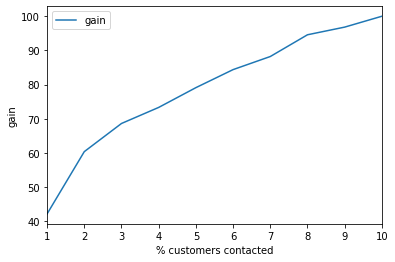

In [368]:
# decile and gain chart
lift_df_final.plot.line(x='decile', y=['gain'])
plt.xlabel('% customers contacted')
plt.ylabel('gain')

Text(0, 0.5, 'lift')

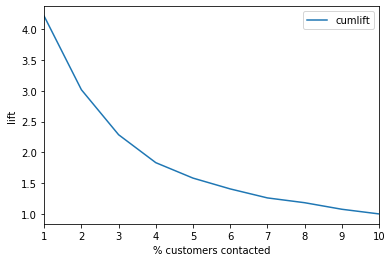

In [369]:
# decile and lift chart
lift_df_final.plot.line(x='decile', y=['cumlift'])
plt.xlabel('% customers contacted')
plt.ylabel('lift')

### Determine the cost of acquisition

##### As per the formula given above, the cost will be equal to
cost = 1* (50 % of 41188) = 20594

##### And if we consider average duration of call and cost of the call based on data available, then acquisition cost will be equal to 

cost = (duration of call) * (cost of call) * (number of contacts made)

# Conclusion